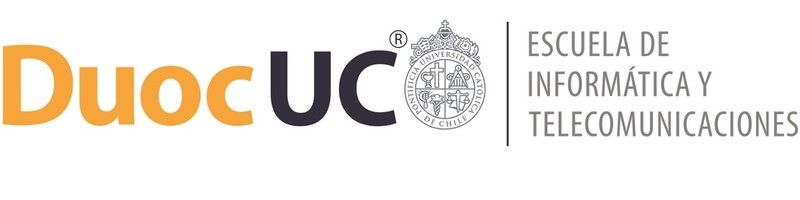

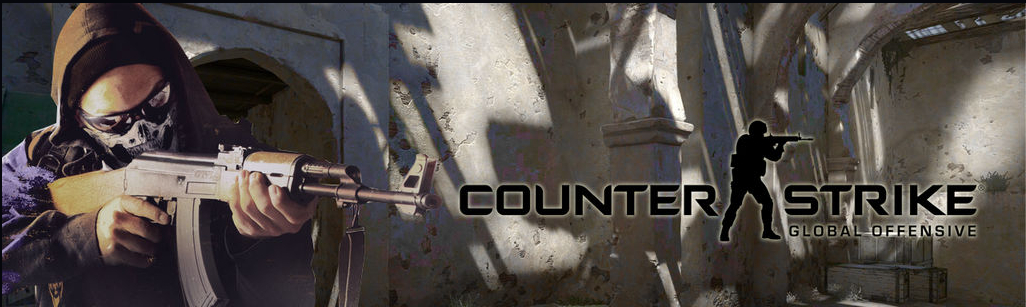

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Cristian Olivares
* Dario García
* Jean Paul Leyton

Docente: Luciano Parada Letelier   

Sección: MLY0100 - 002D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de clasificación

1.- Contexto del negocio: Valve nos ha solicitado un análisis de datos y desarrollo de modelos predictivos
basado en la informacion extraida desde el juego csgo. Juego en el cual hay 2 equipos formados por terroristas y anti-terroristas, los cuales gana el que derrote al equipo contrario.

2.- El objetivo es analizar las partidas con el fin de obtener información y asi poder realizar predicciones para el juego como:
Predecir al equipo ganador en una ronda.
identificar factores que influyen en el desempeño de un jugador
detectar posibles fallas o trampas dentro del juego
mejorar el balanceo del juego, tanto en mecánicas como en matchmaking

## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

In [ ]:
# IMPORTS CONSOLIDADOS PARA PIPELINE CRISP-DM COMPLETO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
from scipy import stats

# Sklearn - Model Selection y Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Sklearn - Preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Sklearn - Linear Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Sklearn - Tree-based Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Sklearn - Support Vector Machines
from sklearn.svm import SVR

# Sklearn - Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Configuración
warnings.filterwarnings('ignore')

In [ ]:
# Importamos el archivo csv

from google.colab import files

uploaded = files.upload()

# Obtenemos el nombre del archivo subido
file_name = next(iter(uploaded))

# Leemos el CSV en un DataFrame
df = pd.read_csv(io.BytesIO(uploaded[file_name]), sep=';')

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


In [ ]:
# Dimensiones del dataset
print("Número de filas y columnas:", df.shape)

# Nombres de columnas
print("\nColumnas del dataset:")
print(df.columns.tolist())

# Primeras filas del dataset
print("\nPrimeras filas:")
display(df.head())

Número de filas y columnas: (79157, 30)

Columnas del dataset:
['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive', 'TravelledDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']

Primeras filas:


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
# Tipos de datos y valores no nulos por columna
print("\nInformación general del DataFrame:")
df.info()


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non

In [ ]:
# Conteo de valores nulos
print("\nValores nulos por columna:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Valores_nulos': missing, 'Porcentaje': missing_percent})
display(missing_df[missing_df['Valores_nulos'] > 0].sort_values('Porcentaje', ascending=False))

# Estadísticas descriptivas de variables numéricas
print("\nEstadísticas descriptivas:")
display(df.describe().T)


Valores nulos por columna:


,Valores_nulos,Porcentaje
Team,2,0.002527
MatchWinner,1,0.001263



Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157.0,60570.193640,36436.598386,600.0,30830.0,56720.0,90639.0,123779.0
InternalTeamId,79157.0,1.500006,0.500003,1.0,1.0,2.0,2.0,2.0
MatchId,79157.0,250.525033,149.557804,4.0,128.0,236.0,373.0,511.0
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0



1. BOXPLOTS INDIVIDUALES
----------------------------------------


<Figure size 1000x400 with 0 Axes>

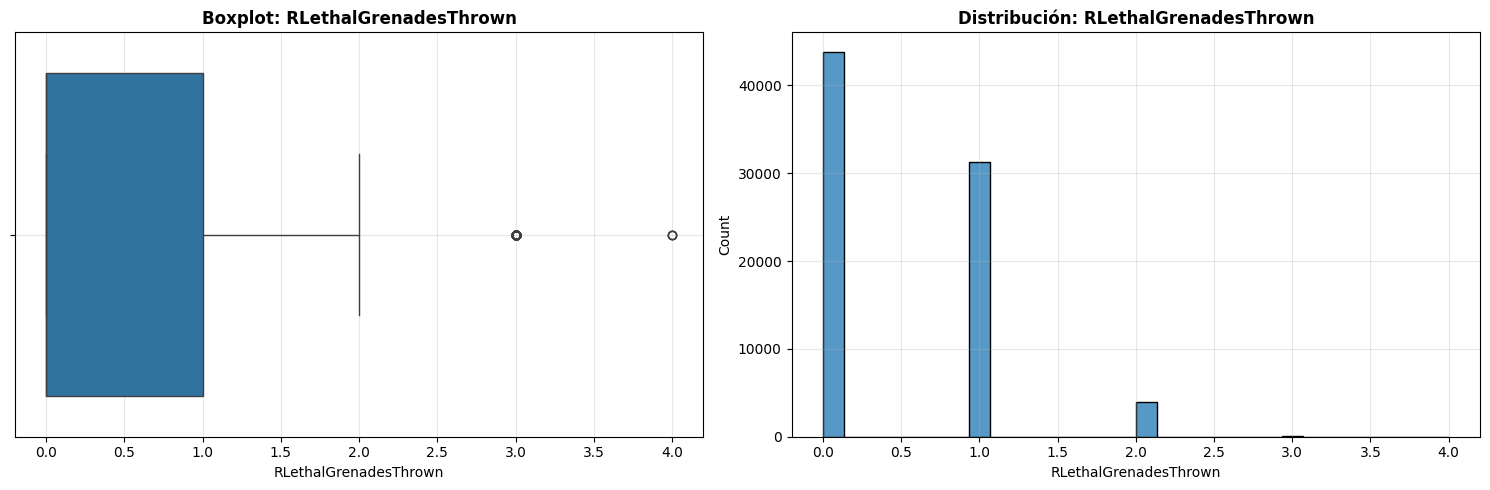

 RLethalGrenadesThrown:
   Outliers detectados: 98 (0.12%)
   Rango normal: [-1.50, 2.50]
   Min: 0.00 | Max: 4.00
   Media: 0.50 | Mediana: 0.00
------------------------------------------------------------


<Figure size 1000x400 with 0 Axes>

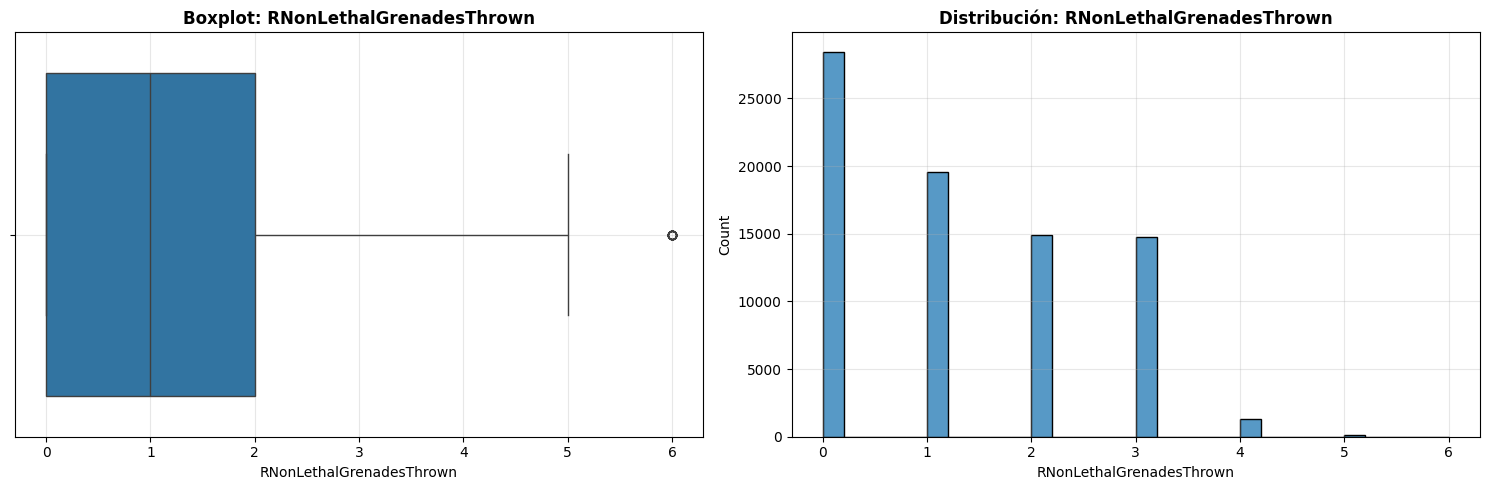

 RNonLethalGrenadesThrown:
   Outliers detectados: 15 (0.02%)
   Rango normal: [-3.00, 5.00]
   Min: 0.00 | Max: 6.00
   Media: 1.26 | Mediana: 1.00
------------------------------------------------------------


<Figure size 1000x400 with 0 Axes>

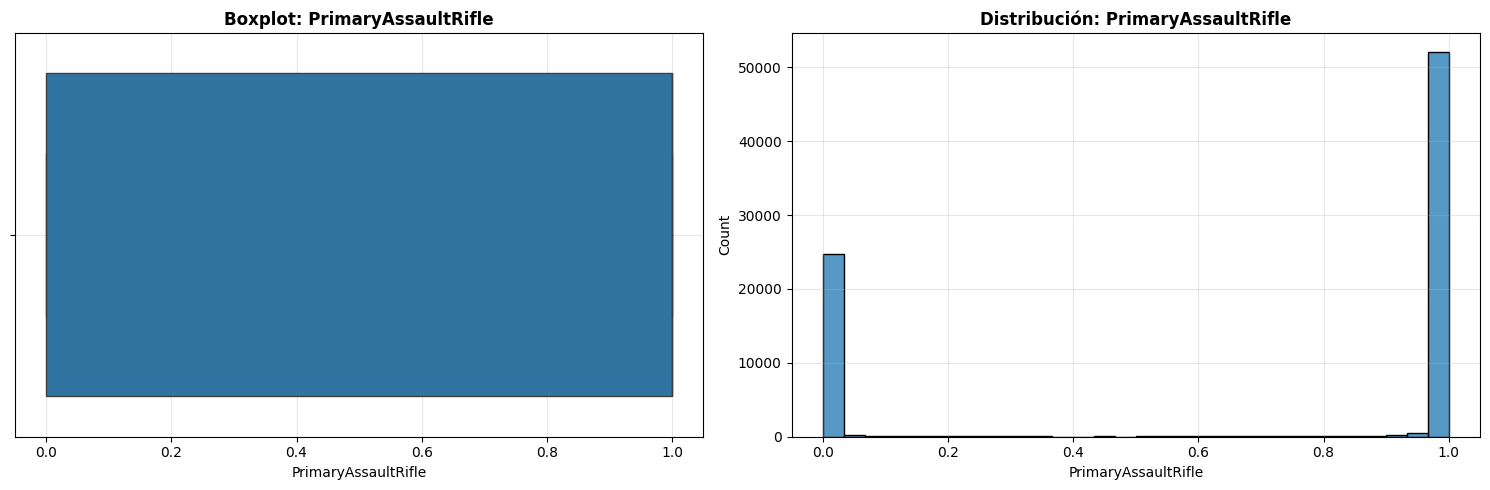

 PrimaryAssaultRifle:
   Outliers detectados: 0 (0.00%)
   Rango normal: [-1.50, 2.50]
   Min: 0.00 | Max: 1.00
   Media: 0.68 | Mediana: 1.00
------------------------------------------------------------


<Figure size 1000x400 with 0 Axes>

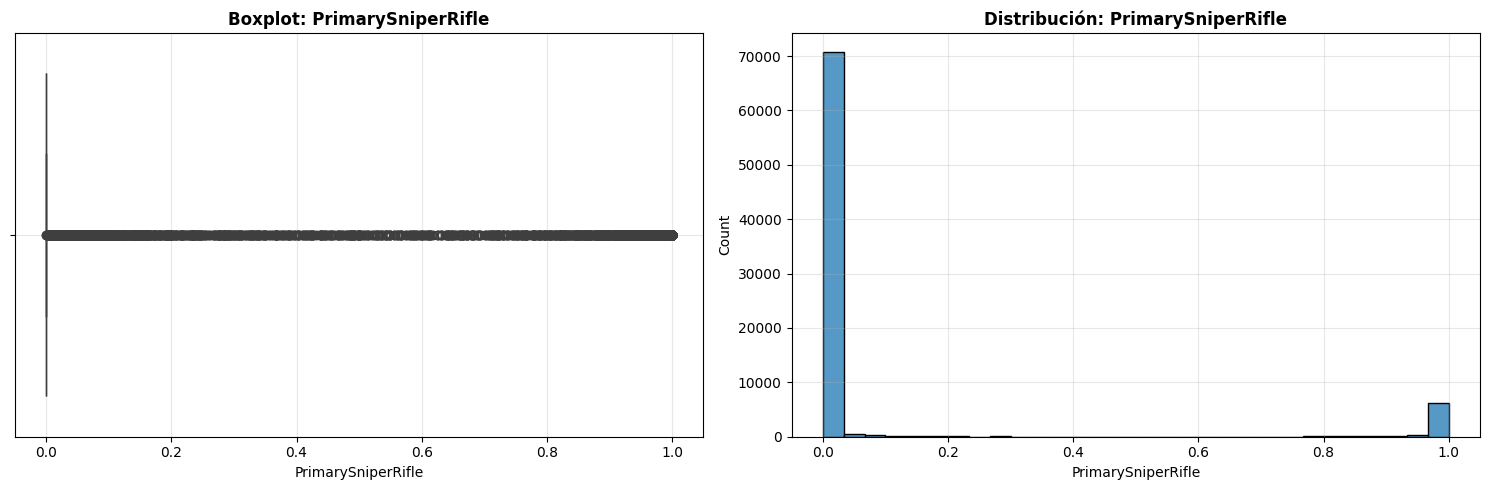

 PrimarySniperRifle:
   Outliers detectados: 9570 (12.09%)
   Rango normal: [0.00, 0.00]
   Min: 0.00 | Max: 1.00
   Media: 0.09 | Mediana: 0.00
------------------------------------------------------------


<Figure size 1000x400 with 0 Axes>

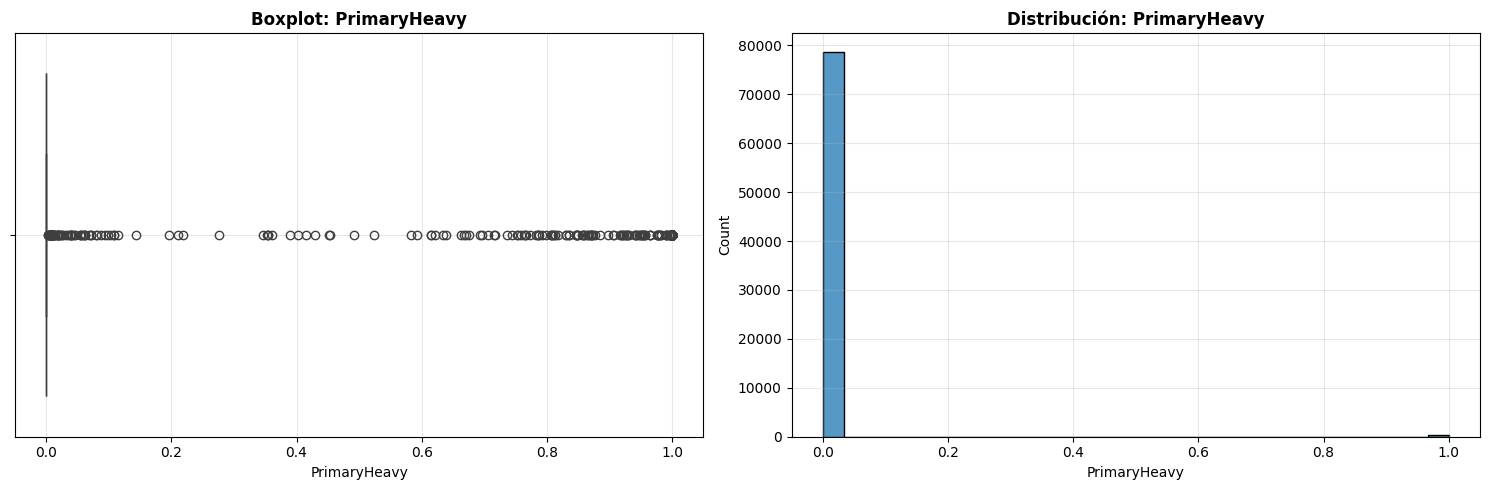

 PrimaryHeavy:
   Outliers detectados: 561 (0.71%)
   Rango normal: [0.00, 0.00]
   Min: 0.00 | Max: 1.00
   Media: 0.01 | Mediana: 0.00
------------------------------------------------------------


<Figure size 1000x400 with 0 Axes>

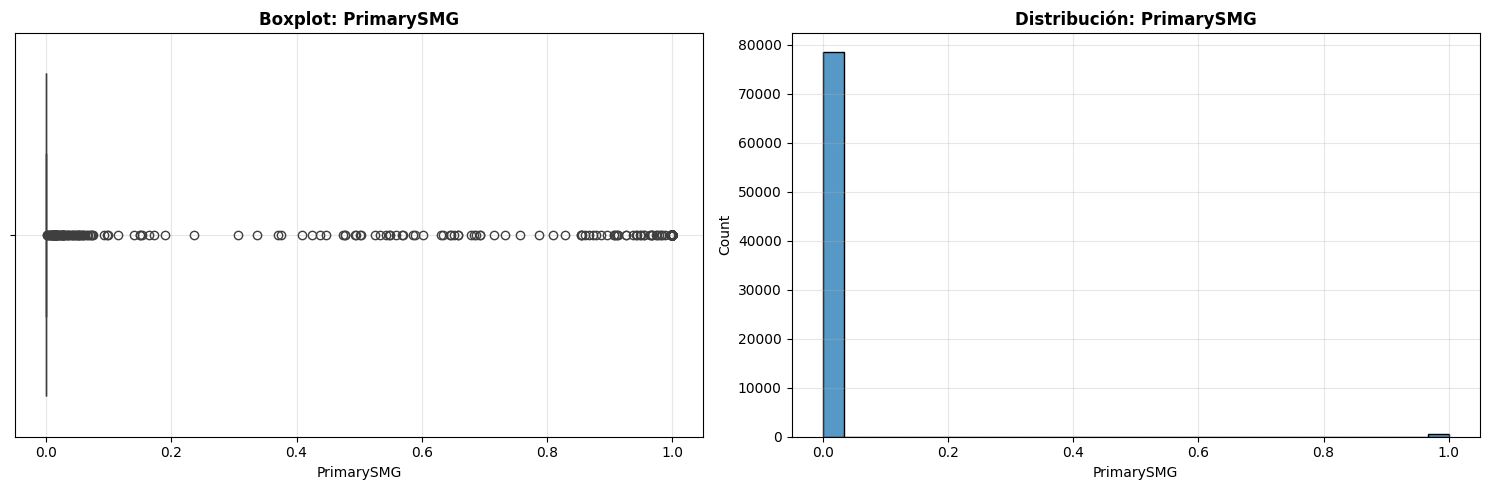

 PrimarySMG:
   Outliers detectados: 656 (0.83%)
   Rango normal: [0.00, 0.00]
   Min: 0.00 | Max: 1.00
   Media: 0.01 | Mediana: 0.00
------------------------------------------------------------


<Figure size 1000x400 with 0 Axes>

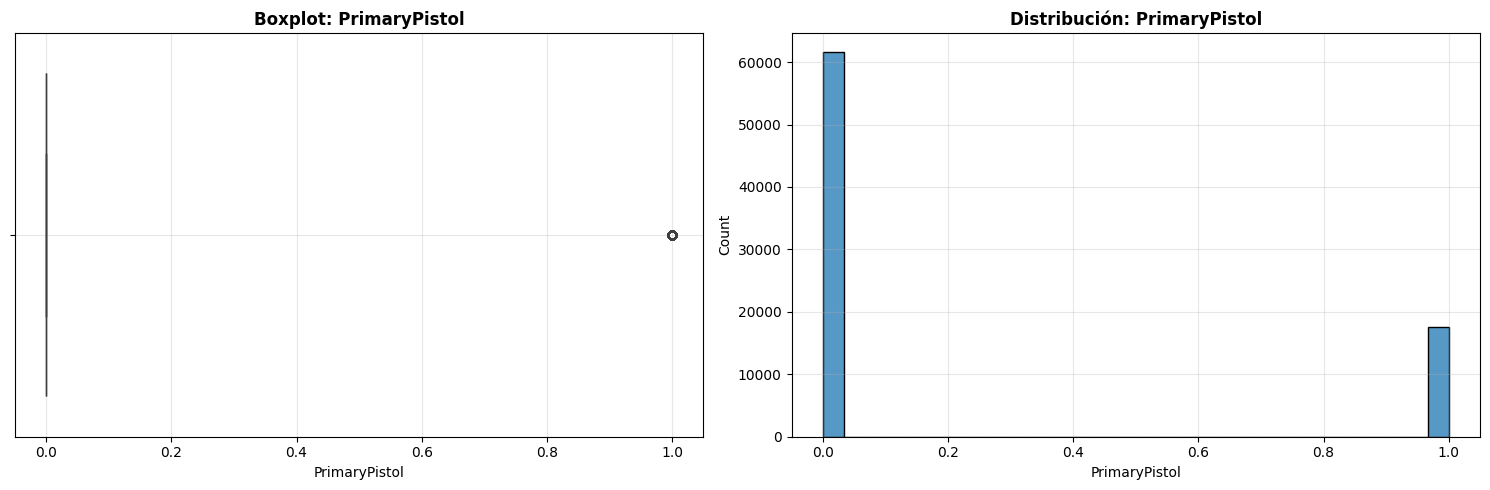

 PrimaryPistol:
   Outliers detectados: 17556 (22.18%)
   Rango normal: [0.00, 0.00]
   Min: 0.00 | Max: 1.00
   Media: 0.22 | Mediana: 0.00
------------------------------------------------------------


<Figure size 1000x400 with 0 Axes>

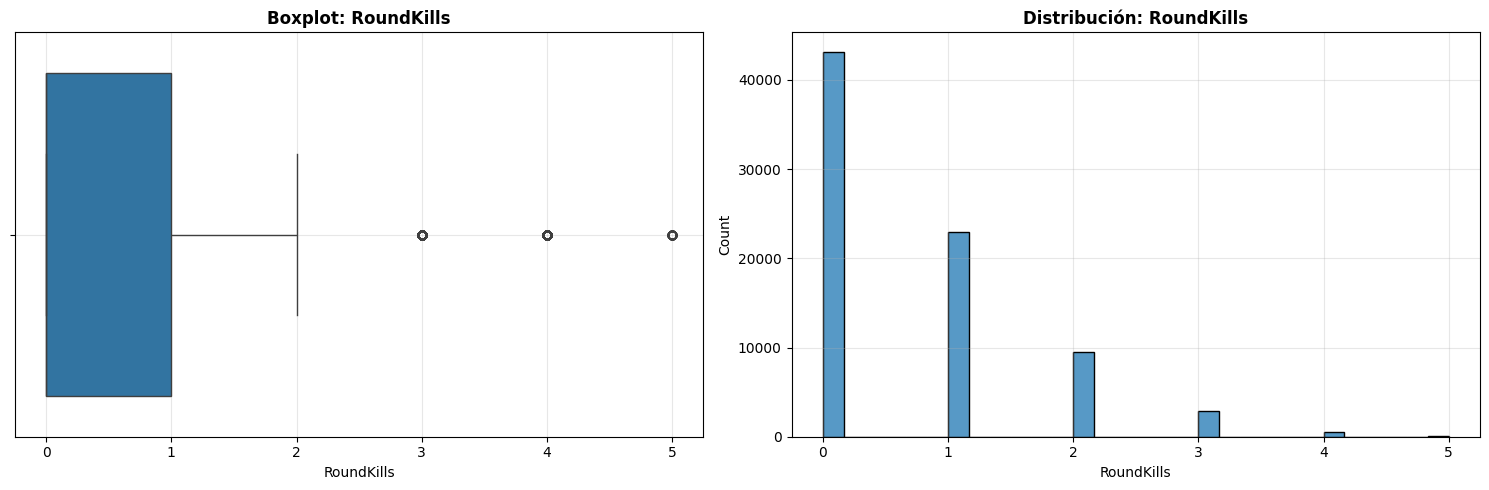

 RoundKills:
   Outliers detectados: 3505 (4.43%)
   Rango normal: [-1.50, 2.50]
   Min: 0.00 | Max: 5.00
   Media: 0.67 | Mediana: 0.00
------------------------------------------------------------


<Figure size 1000x400 with 0 Axes>

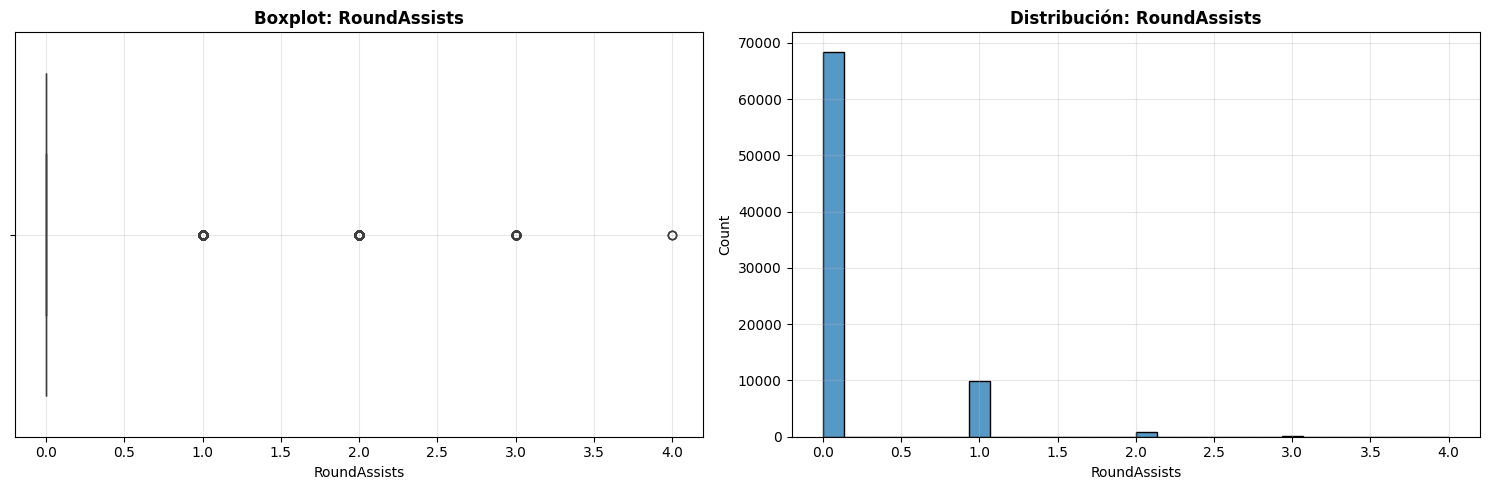

 RoundAssists:
   Outliers detectados: 10692 (13.51%)
   Rango normal: [0.00, 0.00]
   Min: 0.00 | Max: 4.00
   Media: 0.15 | Mediana: 0.00
------------------------------------------------------------


<Figure size 1000x400 with 0 Axes>

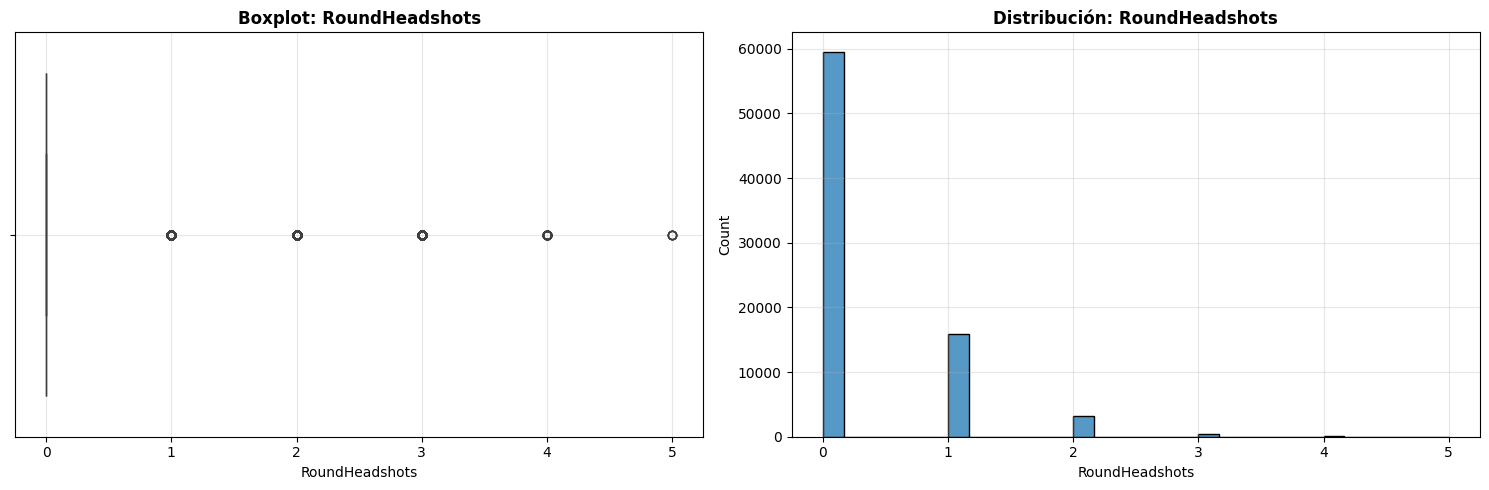

 RoundHeadshots:
   Outliers detectados: 19582 (24.74%)
   Rango normal: [0.00, 0.00]
   Min: 0.00 | Max: 5.00
   Media: 0.30 | Mediana: 0.00
------------------------------------------------------------


<Figure size 1000x400 with 0 Axes>

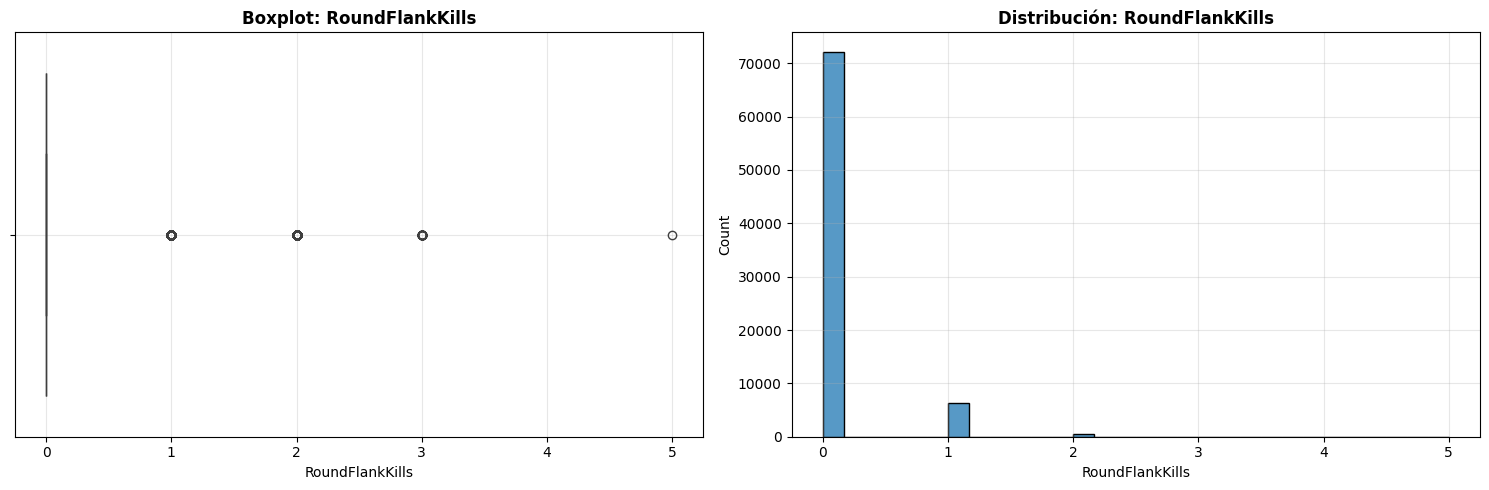

 RoundFlankKills:
   Outliers detectados: 6962 (8.80%)
   Rango normal: [0.00, 0.00]
   Min: 0.00 | Max: 5.00
   Media: 0.10 | Mediana: 0.00
------------------------------------------------------------


<Figure size 1000x400 with 0 Axes>

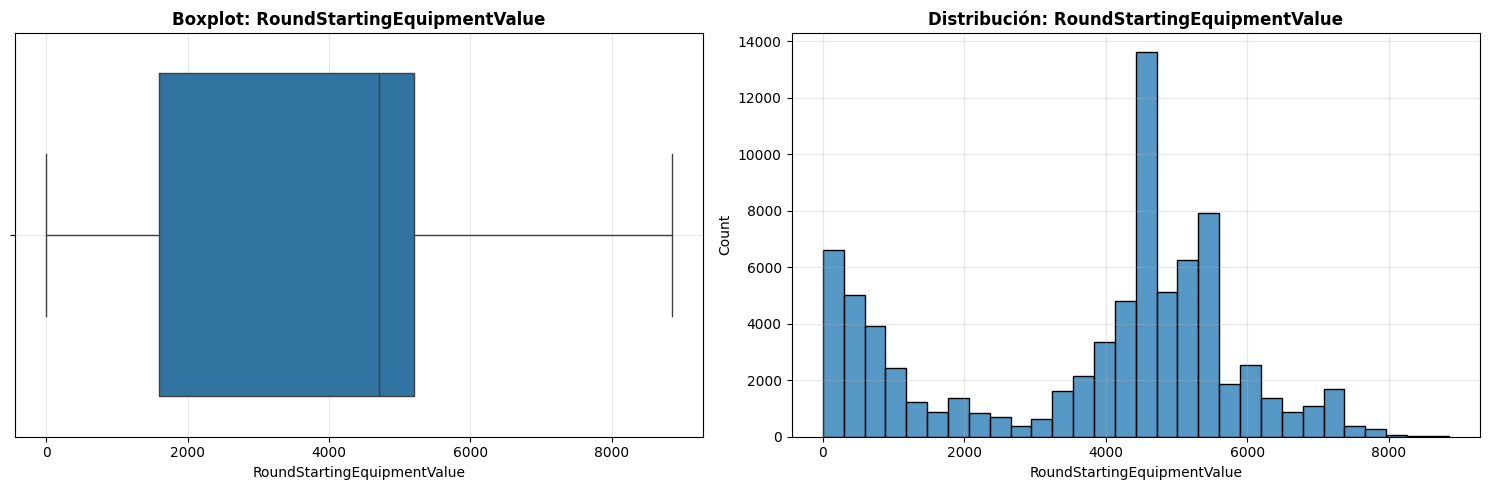

 RoundStartingEquipmentValue:
   Outliers detectados: 0 (0.00%)
   Rango normal: [-3800.00, 10600.00]
   Min: 0.00 | Max: 8850.00
   Media: 3778.11 | Mediana: 4700.00
------------------------------------------------------------


<Figure size 1000x400 with 0 Axes>

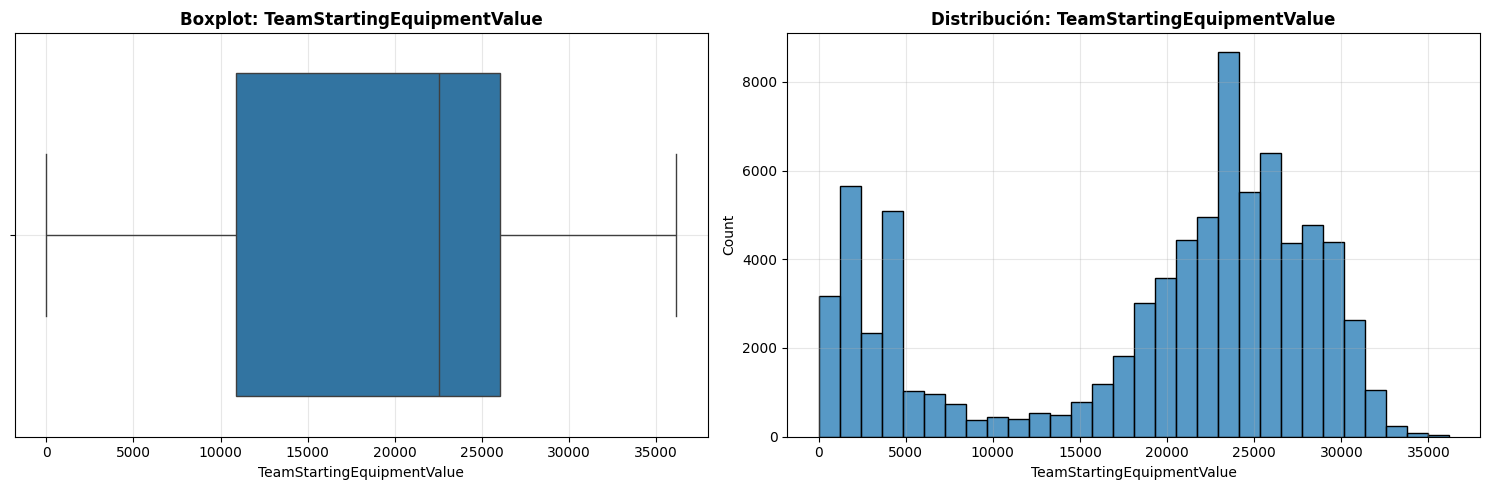

 TeamStartingEquipmentValue:
   Outliers detectados: 0 (0.00%)
   Rango normal: [-11825.00, 48775.00]
   Min: 0.00 | Max: 36150.00
   Media: 18890.13 | Mediana: 22550.00
------------------------------------------------------------


<Figure size 1000x400 with 0 Axes>

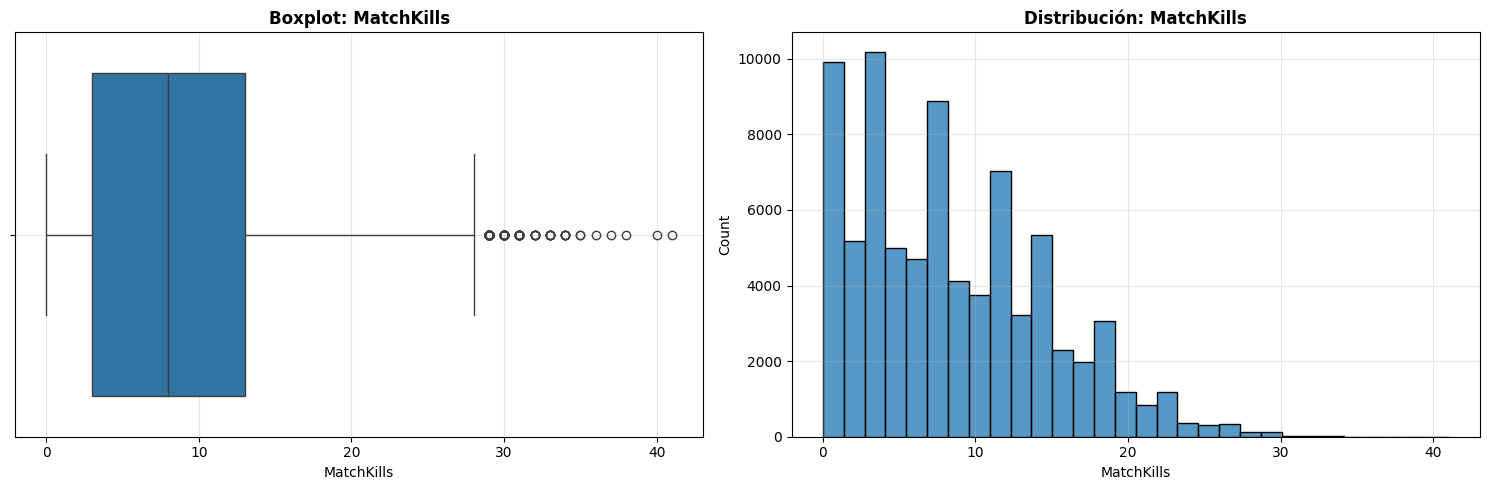

 MatchKills:
   Outliers detectados: 162 (0.20%)
   Rango normal: [-12.00, 28.00]
   Min: 0.00 | Max: 41.00
   Media: 8.51 | Mediana: 8.00
------------------------------------------------------------


<Figure size 1000x400 with 0 Axes>

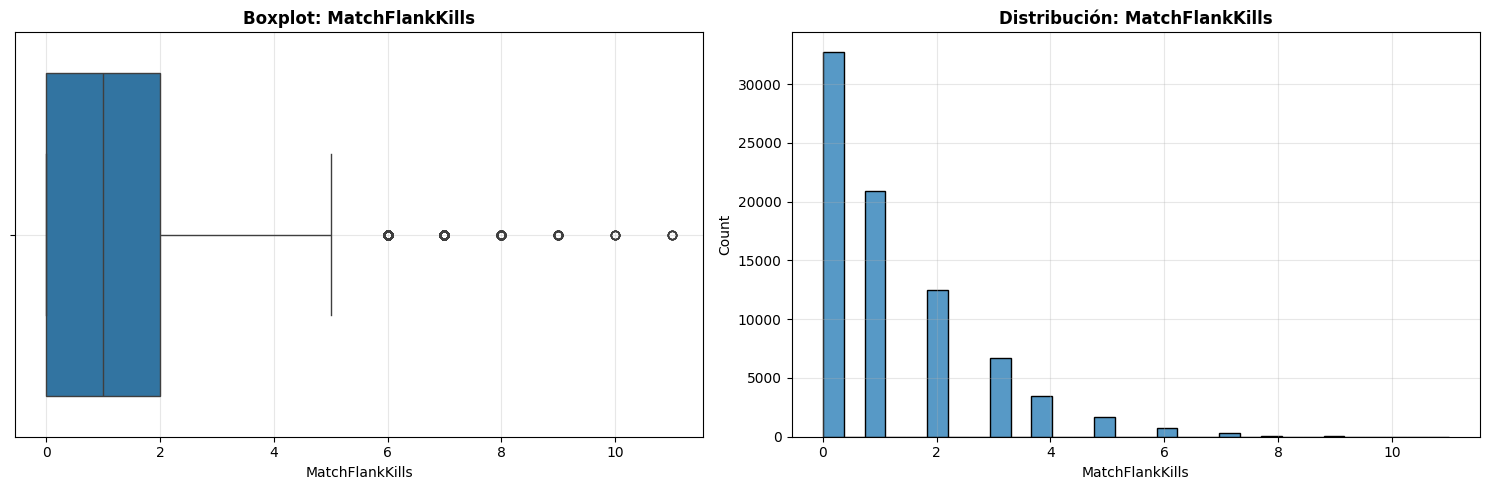

 MatchFlankKills:
   Outliers detectados: 1184 (1.50%)
   Rango normal: [-3.00, 5.00]
   Min: 0.00 | Max: 11.00
   Media: 1.21 | Mediana: 1.00
------------------------------------------------------------


<Figure size 1000x400 with 0 Axes>

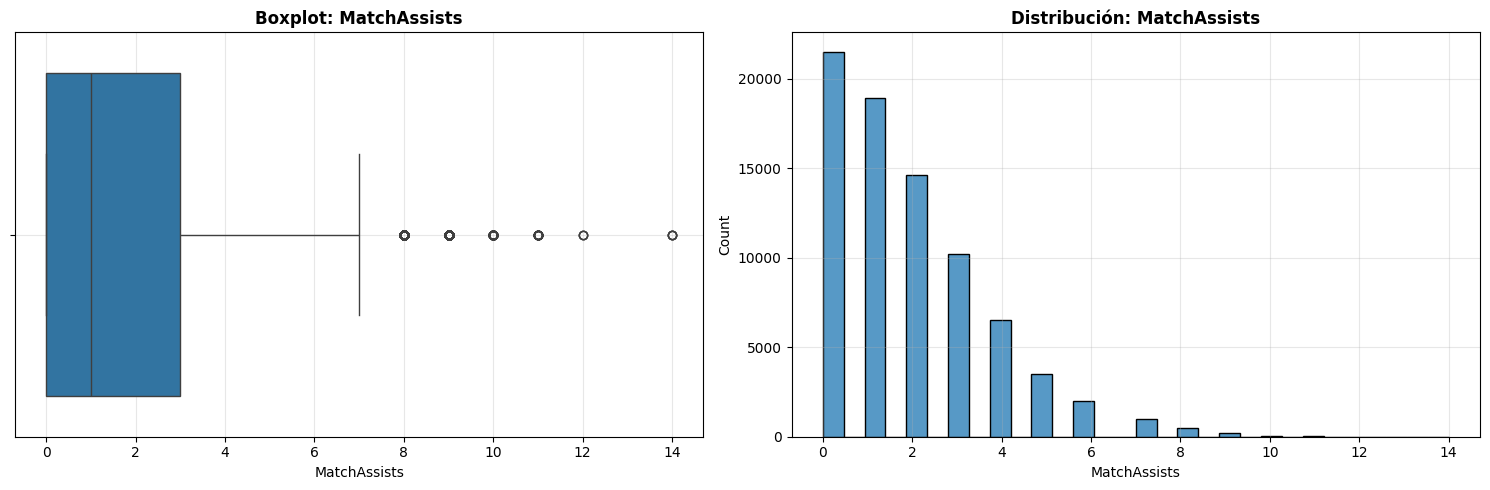

 MatchAssists:
   Outliers detectados: 781 (0.99%)
   Rango normal: [-4.50, 7.50]
   Min: 0.00 | Max: 14.00
   Media: 1.87 | Mediana: 1.00
------------------------------------------------------------


<Figure size 1000x400 with 0 Axes>

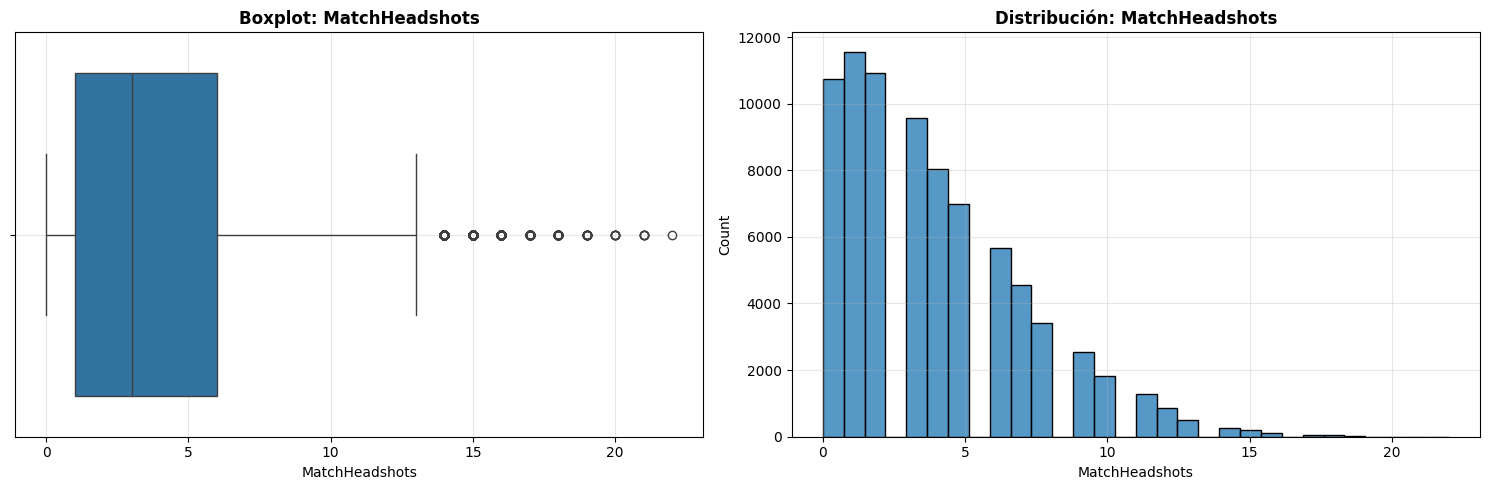

 MatchHeadshots:
   Outliers detectados: 724 (0.91%)
   Rango normal: [-6.50, 13.50]
   Min: 0.00 | Max: 22.00
   Media: 3.86 | Mediana: 3.00
------------------------------------------------------------


In [ ]:
# Seleccionamos todas las columnas numericas para el análisis a través de los boxplots
columnas_boxplot = [
    'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle',
    'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol',
    'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
    'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
    'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'
]

print("\n1. BOXPLOTS INDIVIDUALES")
print("-" * 40)

for col in columnas_boxplot:
    if col in df.columns:
        plt.figure(figsize=(10, 4))

        # Crear subplot con boxplot y estadísticas
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Boxplot
        sns.boxplot(data=df, x=col, ax=ax1)
        ax1.set_title(f"Boxplot: {col}", fontsize=12, fontweight='bold')
        ax1.grid(True, alpha=0.3)

        # Histograma
        sns.histplot(data=df, x=col, bins=30, ax=ax2)
        ax2.set_title(f"Distribución: {col}", fontsize=12, fontweight='bold')
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Estadísticas de outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percent = (outlier_count / len(df)) * 100

        print(f" {col}:")
        print(f"   Outliers detectados: {outlier_count} ({outlier_percent:.2f}%)")
        print(f"   Rango normal: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"   Min: {df[col].min():.2f} | Max: {df[col].max():.2f}")
        print(f"   Media: {df[col].mean():.2f} | Mediana: {df[col].median():.2f}")
        print("-" * 60)

## Fase 3: Data Preparation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Convertimos las columnas de distancia recorrida, tiempo vivo y tiempo de la primera muerte a numérico
cols_a_convertir = ['TimeAlive', 'TravelledDistance', 'FirstKillTime']

for col in cols_a_convertir:
    # Reemplazamos comas por puntos si existieran, luego convertimos a float
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convierte errores a NaN

In [ ]:
# Revisamos los valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Eliminamos filas con valores faltantes en las columnas
df.dropna(subset=['Team', 'MatchWinner'], inplace=True)

# Convertimos columnas booleanas si no están en ese tipo
bool_cols = ['Survived', 'AbnormalMatch']
for col in bool_cols:
    df[col] = df[col].astype(bool)

Valores nulos por columna:
Map                                0
Team                               2
InternalTeamId                     0
MatchId                            0
RoundId                            0
RoundWinner                        0
MatchWinner                        1
Survived                           0
AbnormalMatch                      0
TimeAlive                      78377
TravelledDistance              78874
RLethalGrenadesThrown              0
RNonLethalGrenadesThrown           0
PrimaryAssaultRifle                0
PrimarySniperRifle                 0
PrimaryHeavy                       0
PrimarySMG                         0
PrimaryPistol                      0
FirstKillTime                  69947
RoundKills                         0
RoundAssists                       0
RoundHeadshots                     0
RoundFlankKills                    0
RoundStartingEquipmentValue        0
TeamStartingEquipmentValue         0
MatchKills                         0
MatchFlankK

In [ ]:
# Revisamos tipos de datos y ajustar si es necesario
# Asegurarse que los IDs y contadores estén en enteros
int_cols = ['InternalTeamId', 'MatchId', 'RoundId', 'RLethalGrenadesThrown',
            'RNonLethalGrenadesThrown', 'PrimaryPistol', 'RoundKills', 'RoundAssists',
            'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue',
            'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills',
            'MatchAssists', 'MatchHeadshots']

for col in int_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Verificamos los datos
print("Tipos de datos tras limpieza:")
print(df.dtypes)
print("Dimensiones del dataset tras limpieza:", df.shape)

Tipos de datos tras limpieza:
Map                             object
Team                            object
InternalTeamId                   int64
MatchId                          int64
RoundId                          int64
RoundWinner                     object
MatchWinner                     object
Survived                          bool
AbnormalMatch                     bool
TimeAlive                      float64
TravelledDistance              float64
RLethalGrenadesThrown            int64
RNonLethalGrenadesThrown         int64
PrimaryAssaultRifle            float64
PrimarySniperRifle             float64
PrimaryHeavy                   float64
PrimarySMG                     float64
PrimaryPistol                    int64
FirstKillTime                  float64
RoundKills                       int64
RoundAssists                     int64
RoundHeadshots                   int64
RoundFlankKills                  int64
RoundStartingEquipmentValue      int64
TeamStartingEquipmentValue       i

In [ ]:
# Convertimos las columnas de tipo object a tipo numericas

for col in ['TimeAlive', 'TravelledDistance', 'FirstKillTime']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Codificamos las columnas de que son de tipo object para la fase de modelado

df = pd.get_dummies(df, columns=['Map', 'RoundWinner'], drop_first=True)

In [ ]:
print("Valores nulos:\n", df.isnull().sum())
df.dropna(inplace=True)

Valores nulos:
 Team                               0
InternalTeamId                     0
MatchId                            0
RoundId                            0
MatchWinner                        0
Survived                           0
AbnormalMatch                      0
TimeAlive                      78374
TravelledDistance              78871
RLethalGrenadesThrown              0
RNonLethalGrenadesThrown           0
PrimaryAssaultRifle                0
PrimarySniperRifle                 0
PrimaryHeavy                       0
PrimarySMG                         0
PrimaryPistol                      0
FirstKillTime                  69945
RoundKills                         0
RoundAssists                       0
RoundHeadshots                     0
RoundFlankKills                    0
RoundStartingEquipmentValue        0
TeamStartingEquipmentValue         0
MatchKills                         0
MatchFlankKills                    0
MatchAssists                       0
MatchHeadshots        

In [ ]:
# Imputación de valores nulos con la mediana
# Estas columnas (TimeAlive, TravelledDistance, FirstKillTime) son numéricas e importantes para el análisis.
# Imputamos con la mediana frente a outliers y preservamos la mayoría de los datos
for col in ['TimeAlive', 'TravelledDistance', 'FirstKillTime']:
    # Calculamos la mediana de la columna ignorando los valores nulos automáticamente
    median_value = df[col].median()
    # Rellenamos los valores nulos con la mediana
    df[col] = df[col].fillna(median_value)
    # Imprimimos la mediana usada para referencia
    print(f"Mediana usada para {col}: {median_value}")

Mediana usada para TimeAlive: 0.0
Mediana usada para TravelledDistance: 0.0
Mediana usada para FirstKillTime: 0.0


In [ ]:
# Verificar si realmente TODAS las distancias son 0
print(f"Valores únicos en TravelledDistance: {df['TravelledDistance'].unique()[:10]}")
print(f"Máximo valor en TravelledDistance: {df['TravelledDistance'].max()}")

print(f"Valores únicos en FirstKillTime: {df['FirstKillTime'].unique()[:10]}")
print(f"Máximo valor en FirstKillTime: {df['FirstKillTime'].max()}")

print("\nIMPUTACIÓN FINAL")

# Para variables con valores no-cero: usar mediana no-cero
for col in ['TimeAlive', 'TravelledDistance', 'FirstKillTime']:
    non_zero_values = df[col][df[col] > 0]

    if len(non_zero_values) > 0:
        median_non_zero = non_zero_values.median()
        print(f" Imputando {col} con mediana no-cero: {median_non_zero}")
        df[col] = df[col].fillna(median_non_zero)
    else:
        # Si solo hay ceros, usar un valor mínimo realista o la media general
        mean_value = df[col].mean()
        print(f"  {col} solo tiene ceros. Imputando con media: {mean_value}")
        df[col] = df[col].fillna(mean_value)

# Verificar que no queden valores nulos
print(f"\nValores nulos restantes: {df[['TimeAlive', 'TravelledDistance', 'FirstKillTime']].isnull().sum().sum()}")

Valores únicos en TravelledDistance: [0.]
Máximo valor en TravelledDistance: 0.0
Valores únicos en FirstKillTime: [0.]
Máximo valor en FirstKillTime: 0.0

IMPUTACIÓN FINAL
 Imputando TimeAlive con mediana no-cero: 18.0
  TravelledDistance solo tiene ceros. Imputando con media: 0.0
  FirstKillTime solo tiene ceros. Imputando con media: 0.0

Valores nulos restantes: 0


In [ ]:

# ====================================================================
# FASE 3: PREPARACIÓN DE DATOS (DATA PREPARATION) - CRISP-DM
# ====================================================================


def fase3_preparacion_datos(df):

    print(" FASE 3: PREPARACIÓN DE DATOS (DATA PREPARATION)")
    print("=" * 60)

    # ================================================================
    # 3.1 LIMPIEZA INICIAL
    # ================================================================
    print("\n 3.1 LIMPIEZA INICIAL")
    print("-" * 30)

    df_clean = df.copy()

    # Eliminar columnas irrelevantes
    if 'Unnamed: 0' in df_clean.columns:
        df_clean.drop(columns=['Unnamed: 0'], inplace=True)
        print("Eliminada columna 'Unnamed: 0'")

    print(f" Dimensiones iniciales: {df_clean.shape}")

    # ================================================================
    # 3.2 TRATAMIENTO DE VALORES FALTANTES
    # ================================================================
    print("\n 3.2 ANÁLISIS Y TRATAMIENTO DE VALORES FALTANTES")
    print("-" * 50)

    # Convertir columnas problemáticas a numérico
    cols_a_convertir = ['TimeAlive', 'TravelledDistance', 'FirstKillTime']

    for col in cols_a_convertir:
        if col in df_clean.columns:
            # Reemplazar comas por puntos y convertir
            df_clean[col] = df_clean[col].astype(str).str.replace(',', '.')
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
            print(f"Convertida columna '{col}' a numérico")

    # Eliminar filas con valores faltantes críticos
    critical_cols = ['Team', 'MatchWinner']
    initial_rows = len(df_clean)
    df_clean.dropna(subset=critical_cols, inplace=True)
    print(f" Eliminadas {initial_rows - len(df_clean)} filas con valores críticos faltantes")

    # Análisis de valores nulos
    print(f"\n VALORES NULOS POR COLUMNA:")
    missing = df_clean.isnull().sum()
    missing_percent = (missing / len(df_clean)) * 100
    missing_df = pd.DataFrame({
        'Valores_nulos': missing,
        'Porcentaje': missing_percent
    })
    missing_summary = missing_df[missing_df['Valores_nulos'] > 0].sort_values('Porcentaje', ascending=False)

    if len(missing_summary) > 0:
        print(missing_summary)

        # Imputación inteligente para columnas numéricas importantes
        numeric_cols_to_impute = ['TimeAlive', 'TravelledDistance', 'FirstKillTime']

        for col in numeric_cols_to_impute:
            if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
                # Usar mediana de valores no-cero si existen
                non_zero_values = df_clean[col][df_clean[col] > 0]

                if len(non_zero_values) > 0:
                    median_non_zero = non_zero_values.median()
                    df_clean[col] = df_clean[col].fillna(median_non_zero)
                    print(f" Imputado '{col}' con mediana no-cero: {median_non_zero:.2f}")
                else:
                    # Si solo hay ceros, usar la media general
                    mean_value = df_clean[col].mean()
                    df_clean[col] = df_clean[col].fillna(mean_value)
                    print(f" Imputado '{col}' con media: {mean_value:.2f}")
    else:
        print(" No se encontraron valores nulos")

    # ================================================================
    # 3.3 DETECCIÓN Y TRATAMIENTO DE OUTLIERS
    # ================================================================
    print("\n 3.3 DETECCIÓN Y TRATAMIENTO DE OUTLIERS")
    print("-" * 45)

    # Seleccionar columnas numéricas para análisis de outliers
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

    # Excluir IDs y variables categóricas codificadas
    exclude_outlier_cols = ['MatchId', 'RoundId', 'InternalTeamId']
    numeric_cols = [col for col in numeric_cols if col not in exclude_outlier_cols]

    outlier_summary = []

    for col in numeric_cols:
        if col == 'TimeAlive':  # No modificar la variable objetivo
            continue

        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Contar outliers antes del tratamiento
        outliers_before = len(df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)])

        # Winsorización (cliping) - más robusto que eliminación
        df_clean[col] = np.clip(df_clean[col], lower_bound, upper_bound)

        outlier_summary.append({
            'Columna': col,
            'Outliers_detectados': outliers_before,
            'Porcentaje': (outliers_before / len(df_clean)) * 100,
            'Rango_final': f"[{lower_bound:.2f}, {upper_bound:.2f}]"
        })

    # Mostrar resumen de outliers
    outlier_df = pd.DataFrame(outlier_summary)
    outlier_df = outlier_df[outlier_df['Outliers_detectados'] > 0].sort_values('Porcentaje', ascending=False)

    if len(outlier_df) > 0:
        print(" OUTLIERS TRATADOS:")
        for _, row in outlier_df.head(10).iterrows():
            print(f"   {row['Columna']}: {row['Outliers_detectados']} outliers ({row['Porcentaje']:.1f}%) -> {row['Rango_final']}")
    else:
        print("No se detectaron outliers significativos")

    # ================================================================
    # 3.4 INGENIERÍA DE CARACTERÍSTICAS
    # ================================================================
    print("\n 3.4 INGENIERÍA DE CARACTERÍSTICAS")
    print("-" * 40)

    # Crear características derivadas relevantes para Counter Strike
    initial_features = len(df_clean.columns)

    # 1. Ratios de rendimiento
    if 'MatchKills' in df_clean.columns and 'MatchAssists' in df_clean.columns:
        df_clean['KillAssistRatio'] = df_clean['MatchKills'] / (df_clean['MatchAssists'] + 1)
        print(" Creada: KillAssistRatio = MatchKills / (MatchAssists + 1)")

    if 'MatchHeadshots' in df_clean.columns and 'MatchKills' in df_clean.columns:
        df_clean['HeadshotRatio'] = df_clean['MatchHeadshots'] / (df_clean['MatchKills'] + 1)
        print(" Creada: HeadshotRatio = MatchHeadshots / (MatchKills + 1)")

    if 'MatchFlankKills' in df_clean.columns and 'MatchKills' in df_clean.columns:
        df_clean['FlankKillRatio'] = df_clean['MatchFlankKills'] / (df_clean['MatchKills'] + 1)
        print(" Creada: FlankKillRatio = MatchFlankKills / (MatchKills + 1)")

    # 2. Eficiencia de equipamiento
    if 'RoundStartingEquipmentValue' in df_clean.columns and 'RoundKills' in df_clean.columns:
        df_clean['EquipmentEfficiency'] = df_clean['RoundKills'] / (df_clean['RoundStartingEquipmentValue'] + 1)
        print(" Creada: EquipmentEfficiency = RoundKills / (EquipmentValue + 1)")

    # 3. Variables de actividad
    if 'TravelledDistance' in df_clean.columns and 'TimeAlive' in df_clean.columns:
        df_clean['MovementRate'] = df_clean['TravelledDistance'] / (df_clean['TimeAlive'] + 1)
        print(" Creada: MovementRate = TravelledDistance / (TimeAlive + 1)")

    # 4. Codificación de variables categóricas
    categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

    # Excluir columnas que queremos mantener para análisis
    preserve_cols = ['Team', 'MatchWinner']
    categorical_to_encode = [col for col in categorical_cols if col not in preserve_cols]

    if categorical_to_encode:
        df_clean = pd.get_dummies(df_clean, columns=categorical_to_encode, drop_first=True)
        print(f" Codificadas {len(categorical_to_encode)} variables categóricas")

    new_features = len(df_clean.columns) - initial_features
    print(f" Total características creadas: {new_features}")

    # ================================================================
    # 3.5 VALIDACIÓN Y LIMPIEZA FINAL
    # ================================================================
    print("\n 3.5 VALIDACIÓN Y LIMPIEZA FINAL")
    print("-" * 35)

    # Eliminar filas con infinitos o NaN residuales
    initial_rows = len(df_clean)

    # Reemplazar infinitos
    df_clean = df_clean.replace([np.inf, -np.inf], np.nan)

    # Eliminar filas con NaN
    df_clean = df_clean.dropna()

    final_rows = len(df_clean)
    print(f" Eliminadas {initial_rows - final_rows} filas con valores problemáticos")

    # Verificar tipos de datos
    bool_cols = ['Survived', 'AbnormalMatch']
    for col in bool_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].astype(bool)

    # Asegurar que columnas enteras sean int
    int_cols = ['MatchId', 'RoundId', 'InternalTeamId', 'RLethalGrenadesThrown',
                'RNonLethalGrenadesThrown', 'RoundKills', 'RoundAssists', 'RoundHeadshots']

    for col in int_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].astype(int)

    # ================================================================
    # 3.6 RESUMEN FINAL
    # ================================================================
    print("\n 3.6 RESUMEN DE PREPARACIÓN")
    print("-" * 30)
    print(f" Dimensiones finales: {df_clean.shape}")
    print(f"Variable objetivo (TimeAlive):")
    print(f"   Min: {df_clean['TimeAlive'].min():.2f}")
    print(f"   Max: {df_clean['TimeAlive'].max():.2f}")
    print(f"   Media: {df_clean['TimeAlive'].mean():.2f}")
    print(f"   Mediana: {df_clean['TimeAlive'].median():.2f}")
    print(f"   Std: {df_clean['TimeAlive'].std():.2f}")

    print(f"\n FASE 3 COMPLETADA EXITOSAMENTE")
    print(f" Datos listos para modelado")

    return df_clean

In [ ]:
# Ejecutar la preparación de datos
df_preparado = fase3_preparacion_datos(df)

# Los datos están ahora listos para la Fase 4 (Modelado)
print(f" Datos preparados: {df_preparado.shape}")

 FASE 3: PREPARACIÓN DE DATOS (DATA PREPARATION)

 3.1 LIMPIEZA INICIAL
------------------------------
 Dimensiones iniciales: (32, 33)

 3.2 ANÁLISIS Y TRATAMIENTO DE VALORES FALTANTES
--------------------------------------------------
Convertida columna 'TimeAlive' a numérico
Convertida columna 'TravelledDistance' a numérico
Convertida columna 'FirstKillTime' a numérico
 Eliminadas 0 filas con valores críticos faltantes

 VALORES NULOS POR COLUMNA:
 No se encontraron valores nulos

 3.3 DETECCIÓN Y TRATAMIENTO DE OUTLIERS
---------------------------------------------
 OUTLIERS TRATADOS:
   TeamStartingEquipmentValue: 11 outliers (34.4%) -> [5212.50, 13512.50]
   RoundStartingEquipmentValue: 5 outliers (15.6%) -> [-962.50, 2137.50]

 3.4 INGENIERÍA DE CARACTERÍSTICAS
----------------------------------------
 Creada: KillAssistRatio = MatchKills / (MatchAssists + 1)
 Creada: HeadshotRatio = MatchHeadshots / (MatchKills + 1)
 Creada: FlankKillRatio = MatchFlankKills / (MatchKills + 1)
 

## Fase 4: Modeling

In [ ]:
# Insertar cuantos bloques de código consideren necesarios


In [ ]:
# ====================================================================
# FASE 4: MODELADO (MODELING) - CRISP-DM MEJORADO
# ====================================================================

def fase4_modelado_mejorado(df_preparado):
    # =====================
    # DEFINIR LAS FEATURES
    # =====================
    features = [
        'MatchKills',
        'MatchAssists',
        'MatchHeadshots',
        'PrimaryAssaultRifle',
        'PrimarySniperRifle',
        'TravelledDistance',
        'RoundStartingEquipmentValue',
        'EquipmentEfficiency',
        'HeadshotRatio',
        'KillAssistRatio',
        'MovementRate'
    ]
    target = 'TimeAlive'


    print(" FASE 4: MODELADO (MODELING) - CRISP-DM")
    print("=" * 50)

    # ================================================================
    # 4.1 SELECCIÓN DE TÉCNICAS DE MODELADO
    # ================================================================
    print("\n 4.1 SELECCIÓN DE TÉCNICAS DE MODELADO")
    print("-" * 40)
    print("   1.  Árbol de Decisión: Captura relaciones no lineales")
    print("   2.  Random Forest: Ensemble robusto, reduce overfitting")
    print("   3.  SVR: Support Vector Regression, maneja outliers")

    # ================================================================
    # 4.2 DISEÑO DEL EXPERIMENTO
    # ================================================================
    print("\n 4.2 DISEÑO DEL EXPERIMENTO")
    print("-" * 30)

    # 4.2.1 Selección de características MEJORADA
    print(" 4.2.1 Selección de Características")

    # Mantener tus características originales + algunas nuevas relevantes
    features_originales = [
        'MatchKills', 'MatchAssists', 'MatchHeadshots',
        'PrimaryAssaultRifle', 'PrimarySniperRifle',
        'TravelledDistance', 'RoundStartingEquipmentValue'
    ]

    # Añadir características engineered si existen
    features_adicionales = []
    for col in ['KillAssistRatio', 'HeadshotRatio', 'EquipmentEfficiency', 'MovementRate']:
        if col in df_preparado.columns:
            features_adicionales.append(col)

    # Combinar características
    features = features_originales + features_adicionales

    # Verificar que todas las características existen
    features_disponibles = [f for f in features if f in df_preparado.columns]
    features_faltantes = [f for f in features if f not in df_preparado.columns]

    if features_faltantes:
        print(f" Características no disponibles: {features_faltantes}")

    features = features_disponibles
    target = 'TimeAlive'

    print(f" Características seleccionadas ({len(features)}):")
    for i, feat in enumerate(features, 1):
        print(f"   {i:2d}. {feat}")
    print(f" Variable objetivo: {target}")

    # 4.2.2 Preparación de matrices
    print(f"\n 4.2.2 Preparación de Matrices")

    X = df_preparado[features].copy()
    y = df_preparado[target].copy()

    print(f" Dimensiones X: {X.shape}")
    print(f" Dimensiones y: {y.shape}")

    # Verificación de calidad de datos
    print(f" Verificación de calidad:")
    print(f"   NaN en X: {X.isnull().sum().sum()}")
    print(f"   NaN en y: {y.isnull().sum()}")
    print(f"   Infinitos en X: {np.isinf(X).sum().sum()}")
    print(f"   Infinitos en y: {np.isinf(y).sum()}")

    # Limpieza final si es necesaria
    if X.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
        print(" Limpieza final de datos...")
        mask = ~(X.isnull().any(axis=1) | y.isnull())
        X = X[mask]
        y = y[mask]
        print(f" Datos finales: {X.shape[0]} filas")

    # ================================================================
    # 4.3 CONSTRUCCIÓN DE MODELOS
    # ================================================================
    print("\n 4.3 CONSTRUCCIÓN DE MODELOS")
    print("-" * 30)

    # 4.3.1 División de datos MEJORADA
    print(" 4.3.1 División de Datos")

    # Intentar división estratificada, si falla usar división simple
    try:
        # División estratificada por cuartiles de la variable objetivo
        y_quartiles = pd.qcut(y, q=4, labels=False, duplicates='drop')

        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=0.2,
            random_state=42,
            stratify=y_quartiles
        )
        print("División estratificada aplicada")

    except (ValueError, Exception) as e:
        print(f" No se pudo aplicar división estratificada: {str(e)[:100]}")
        print(" Aplicando división aleatoria simple...")

        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=0.2,
            random_state=42
        )
        print(" División aleatoria aplicada")

    print(f" Conjunto de entrenamiento: {X_train.shape[0]} muestras")
    print(f" Conjunto de prueba: {X_test.shape[0]} muestras")
    print(f" Distribución y_train - Min: {y_train.min():.2f}, Max: {y_train.max():.2f}, Media: {y_train.mean():.2f}")
    print(f" Distribución y_test - Min: {y_test.min():.2f}, Max: {y_test.max():.2f}, Media: {y_test.mean():.2f}")

    # 4.3.2 Escalado ROBUSTO
    print(f"\n 4.3.2 Escalado de Características")

    # Usar RobustScaler (mejor para outliers) en lugar de StandardScaler
    scaler = RobustScaler()  # Más robusto que StandardScaler

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(" Aplicado RobustScaler (robusto ante outliers)")

    # Convertir de vuelta a DataFrame para mantener nombres
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=features, index=X_test.index)

    # ================================================================
    # 4.4 ENTRENAMIENTO CON OPTIMIZACIÓN DE HIPERPARÁMETROS
    # ================================================================
    print(f"\n 4.4 ENTRENAMIENTO CON OPTIMIZACIÓN")
    print("-" * 40)

    # Definir modelos con hiperparámetros a optimizar
    modelos_config = {
        'Árbol de Decisión': {
            'modelo': DecisionTreeRegressor(random_state=42),
            'params': {
                'max_depth': [5, 10, 15, 20, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['sqrt', 'log2', None]
            },
            'descripcion': 'Árbol individual con capacidad no lineal'
        },
        'Random Forest': {
            'modelo': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200, 300],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2],
                'max_features': ['sqrt', 'log2']
            },
            'descripcion': 'Ensemble de árboles, robusto y preciso'
        },
        'SVR': {
            'modelo': SVR(),
            'params': {
                'kernel': ['linear', 'rbf'],
                'C': [0.1, 1, 10, 100],
                'epsilon': [0.01, 0.1, 0.2],
                'gamma': ['scale', 'auto']
            },
            'descripcion': 'Support Vector Regression, maneja outliers'
        }
    }

    modelos_entrenados = {}
    resultados_validacion = {}

    for nombre, config in modelos_config.items():
        print(f"\n Entrenando {nombre}...")
        print(f"    {config['descripcion']}")

        if config['params']:  # Si hay hiperparámetros para optimizar
            print(f"   w Optimizando hiperparámetros...")

            # Grid Search con validación cruzada
            grid_search = GridSearchCV(
                config['modelo'],
                config['params'],
                cv=5,
                scoring='neg_mean_squared_error',
                n_jobs=-1,
                verbose=0
            )

            grid_search.fit(X_train_scaled, y_train)

            # Guardar el mejor modelo
            modelos_entrenados[nombre] = grid_search.best_estimator_

            print(f" Mejores parámetros encontrados:")
            for param, value in grid_search.best_params_.items():
                print(f"      {param}: {value}")
            print(f" Mejor score CV: {-grid_search.best_score_:.4f} (RMSE)")

        else:  # Modelo sin hiperparámetros
            print(f" Entrenando modelo base...")
            config['modelo'].fit(X_train_scaled, y_train)
            modelos_entrenados[nombre] = config['modelo']
            print(f"    Modelo entrenado")

        # Validación cruzada para medir estabilidad
        cv_scores = cross_val_score(
            modelos_entrenados[nombre],
            X_train_scaled,
            y_train,
            cv=5,
            scoring='r2'
        )

        resultados_validacion[nombre] = {
            'cv_r2_mean': cv_scores.mean(),
            'cv_r2_std': cv_scores.std(),
            'cv_scores': cv_scores
        }

        print(f" Validación cruzada R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # ================================================================
    # 4.5 EVALUACIÓN PRELIMINAR EN ENTRENAMIENTO
    # ================================================================
    print(f"\n 4.5 EVALUACIÓN PRELIMINAR")
    print("-" * 30)

    evaluacion_preliminar = {}

    for nombre, modelo in modelos_entrenados.items():
        # Predicciones en entrenamiento
        y_train_pred = modelo.predict(X_train_scaled)

        # Métricas de entrenamiento
        train_r2 = r2_score(y_train, y_train_pred)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_mae = mean_absolute_error(y_train, y_train_pred)

        evaluacion_preliminar[nombre] = {
            'train_r2': train_r2,
            'train_rmse': train_rmse,
            'train_mae': train_mae,
            'cv_r2_mean': resultados_validacion[nombre]['cv_r2_mean'],
            'cv_r2_std': resultados_validacion[nombre]['cv_r2_std']
        }

        print(f"\n {nombre}:")
        print(f"   Train R²: {train_r2:.4f}")
        print(f"   Train RMSE: {train_rmse:.4f}")
        print(f"   CV R²: {resultados_validacion[nombre]['cv_r2_mean']:.4f} ± {resultados_validacion[nombre]['cv_r2_std']:.4f}")

    # ================================================================
    # 4.6 PREPARAR RETORNO
    # ================================================================

    datos_modelado = {
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train,
        'y_test': y_test,
        'features': features,
        'scaler': scaler
    }

    print(f"\n FASE 4 COMPLETADA EXITOSAMENTE")
    print(f" {len(modelos_entrenados)} modelos entrenados y optimizados")
    print(f"Datos preparados para evaluación final")

    return modelos_entrenados, datos_modelado, evaluacion_preliminar

# ====================================================================
# FUNCIÓN AUXILIAR PARA COMPARACIÓN RÁPIDA
# ====================================================================

def comparacion_rapida_modelos(evaluacion_preliminar):
    """Comparación rápida de modelos en entrenamiento"""
    print("\n COMPARACIÓN RÁPIDA DE MODELOS")
    print("=" * 40)

    # Crear DataFrame para comparación
    df_comparacion = pd.DataFrame(evaluacion_preliminar).T
    df_comparacion = df_comparacion.round(4)

    # Ordenar por CV R² (más confiable que train R²)
    df_comparacion = df_comparacion.sort_values('cv_r2_mean', ascending=False)

    print(" Ranking por Validación Cruzada (R²):")
    for i, (modelo, row) in enumerate(df_comparacion.iterrows(), 1):
        print(f" {i}. {modelo}")
        print(f" CV R²: {row['cv_r2_mean']:.4f} ± {row['cv_r2_std']:.4f}")
        print(f" Train R²: {row['train_r2']:.4f}")
        print(f"Train RMSE: {row['train_rmse']:.4f}")

    return df_comparacions


In [ ]:
# Ejecutar la Fase 4 corregida
modelos, datos, evaluacion = fase4_modelado_mejorado(df_preparado)

# Ver comparación rápida
comparacion = comparacion_rapida_modelos(evaluacion)

 FASE 4: MODELADO (MODELING) - CRISP-DM

 4.1 SELECCIÓN DE TÉCNICAS DE MODELADO
----------------------------------------
 Algoritmos seleccionados (manteniendo tus modelos originales):
   1.  Regresión Lineal: Modelo base, interpretable
   2.  Árbol de Decisión: Captura relaciones no lineales
   3.  Random Forest: Ensemble robusto, reduce overfitting
   4.  SVR: Support Vector Regression, maneja outliers

 4.2 DISEÑO DEL EXPERIMENTO
------------------------------
 4.2.1 Selección de Características
 Características seleccionadas (11):
    1. MatchKills
    2. MatchAssists
    3. MatchHeadshots
    4. PrimaryAssaultRifle
    5. PrimarySniperRifle
    6. TravelledDistance
    7. RoundStartingEquipmentValue
    8. KillAssistRatio
    9. HeadshotRatio
   10. EquipmentEfficiency
   11. MovementRate
 Variable objetivo: TimeAlive

 4.2.2 Preparación de Matrices
 Dimensiones X: (32, 11)
 Dimensiones y: (32,)
 Verificación de calidad:
   NaN en X: 0
   NaN en y: 0
   Infinitos en X: 0
   Infini

In [ ]:
# Selección de features y variable objetivo
features = [
    'MatchKills', 'MatchAssists', 'MatchHeadshots',
    'PrimaryAssaultRifle', 'PrimarySniperRifle',
    'TravelledDistance', 'RoundStartingEquipmentValue'
]
target = 'TimeAlive'

# Variables predictoras y objetivo
X = df[features]
y = df[target]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Reemplaza infinitos por NaN en X
X = X.replace([np.inf, -np.inf], np.nan)

# Combina X e y en un solo DataFrame para limpiar juntos
df_modelo = pd.concat([X, y], axis=1)

# Elimina cualquier fila que tenga NaN en X o y
df_modelo = df_modelo.dropna()

# Separar X y y nuevamente
X = df_modelo[features]
y = df_modelo[target]

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Asegurar que X_test tenga las mismas columnas que X_train
X_test = pd.DataFrame(X_test, columns=df_modelo[features].columns)
X_train = pd.DataFrame(X_train, columns=df_modelo[features].columns)

# Creación de los modelos
modelos = {
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}
# Entrenar los modelos
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)


In [ ]:
# Guardar métricas de evaluación
resultados = {}

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    resultados[nombre] = {
        'R²': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

# Mostrar resultados como tabla
pd.DataFrame(resultados).T

,R²,MSE,RMSE,MAE
Regresión Lineal,-0.079778,42.838538,6.545116,3.205052
Árbol de Decisión,-0.184524,46.994169,6.855229,3.122449
Random Forest,-0.188703,47.159966,6.867311,3.220504


In [ ]:
mejor_modelo = modelos['Random Forest']  # o el que tenga mejor resultado en R²
y_pred = mejor_modelo.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('TimeAlive real')
plt.ylabel('TimeAlive predicho')
plt.title('Comparación: reales vs predichos')
plt.grid(True)
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- EquipmentEfficiency
- HeadshotRatio
- KillAssistRatio
- MovementRate


### Clasificación



In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de clasificación de datos orientado al caso entregado

## Fase 5: Evaluation

In [ ]:
# ====================================================================
# FASE 5: EVALUACIÓN (EVALUATION) - CRISP-DM
# ====================================================================


def fase5_evaluacion_completa(modelos, datos_modelado, evaluacion_preliminar):

    print(" FASE 5: EVALUACIÓN (EVALUATION) - CRISP-DM")
    print("=" * 55)

    # Extraer datos
    X_train = datos_modelado['X_train']
    X_test = datos_modelado['X_test']
    y_train = datos_modelado['y_train']
    y_test = datos_modelado['y_test']
    features = datos_modelado['features']

    # ================================================================
    # 5.1 EVALUACIÓN DE MODELOS EN CONJUNTO DE PRUEBA
    # ================================================================
    print("\\n 5.1 EVALUACIÓN EN CONJUNTO DE PRUEBA")
    print("-" * 40)

    resultados_finales = {}
    predicciones = {}

    def calcular_metricas(y_true, y_pred, nombre_conjunto):
        """Función auxiliar para calcular métricas"""
        return {
            'R²': r2_score(y_true, y_pred),
            'MSE': mean_squared_error(y_true, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
            'MAE': mean_absolute_error(y_true, y_pred),
            'MAPE': np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if (y_true != 0).all() else np.nan
        }

    for nombre, modelo in modelos.items():
        print(f"\n Evaluando {nombre}...")

        # Asegurar nombres correctos en columnas
        X_train = pd.DataFrame(X_train, columns=features)
        X_test = pd.DataFrame(X_test, columns=features)

        # Predicciones en ambos conjuntos
        y_train_pred = modelo.predict(X_train)
        y_test_pred = modelo.predict(X_test)

        # Guardar predicciones para análisis posterior
        predicciones[nombre] = {
            'train': y_train_pred,
            'test': y_test_pred
        }

        # Calcular métricas
        train_metrics = calcular_metricas(y_train, y_train_pred, 'Train')
        test_metrics = calcular_metricas(y_test, y_test_pred, 'Test')

        resultados_finales[nombre] = {
            'Train': train_metrics,
            'Test': test_metrics,
            'Overfitting': train_metrics['R²'] - test_metrics['R²']  # Diferencia entre train y test
        }

        print(f"   Test R²: {test_metrics['R²']:.4f}")
        print(f"   Test RMSE: {test_metrics['RMSE']:.4f}")
        print(f"   Test MAE: {test_metrics['MAE']:.4f}")
        print(f"   Overfitting: {resultados_finales[nombre]['Overfitting']:.4f}")

    # ================================================================
    # 5.2 TABLA COMPARATIVA DE RESULTADOS
    # ================================================================
    print("\\n 5.2 TABLA COMPARATIVA DE RESULTADOS")
    print("-" * 40)

    # DIAGNÓSTICO CRÍTICO: Verificar si hay problemas fundamentales
    all_r2_zero = all(resultados_finales[m]['Test']['R²'] <= 0.01 for m in modelos.keys())

    if all_r2_zero:
        print("\\n DIAGNÓSTICO CRÍTICO: TODOS LOS MODELOS TIENEN R² ≈ 0")
        print("=" * 55)
        print(" Posibles causas:")
        print("   1.  Variable objetivo tiene poca variabilidad")
        print("   2.  Características no son predictivas de TimeAlive")
        print("   3.  Datos tienen problemas de calidad")
        print("   4. Necesidad de feature engineering más avanzado")

        # Análisis de la variable objetivo
        print(f"\\n Análisis de TimeAlive:")
        print(f"   • Valores únicos: {y_test.nunique()}")
        print(f"   • % de ceros: {(y_test == 0).mean() * 100:.1f}%")
        print(f"   • Varianza: {y_test.var():.4f}")
        print(f"   • Rango: [{y_test.min():.2f}, {y_test.max():.2f}]")

        # Análisis de correlaciones
        if len(datos_modelado['features']) > 0:
            correlations_with_target = []
            X_test_original = datos_modelado['X_test']

            # Correlación entre características y target
            for feature in datos_modelado['features']:
                if feature in X_test_original.columns:
                    try:
                        corr = np.corrcoef(X_test_original[feature], y_test)[0, 1]
                        if not np.isnan(corr):
                            correlations_with_target.append((feature, abs(corr)))
                    except:
                        pass

            correlations_with_target.sort(key=lambda x: x[1], reverse=True)

            print(f"\\n Correlaciones con TimeAlive:")
            for feature, corr in correlations_with_target[:5]:
                print(f"   • {feature}: {corr:.4f}")

            if correlations_with_target and max(corr for _, corr in correlations_with_target) < 0.1:
                print("\\n PROBLEMA IDENTIFICADO: Correlaciones muy bajas (<0.1)")
                print(" RECOMENDACIONES URGENTES:")
                print("   1.  Revisar selección de características")
                print("   2.  Crear nuevas características más relevantes")
                print("   3.  Considerar transformaciones de TimeAlive")
                print("   4.  Evaluar si TimeAlive es realmente predecible")

    # Crear tabla comprehensiva
    tabla_resultados = []

    for modelo in modelos.keys():
        # Métricas de entrenamiento
        tabla_resultados.append({
            'Modelo': modelo,
            'Conjunto': 'Train',
            'R²': resultados_finales[modelo]['Train']['R²'],
            'RMSE': resultados_finales[modelo]['Train']['RMSE'],
            'MAE': resultados_finales[modelo]['Train']['MAE'],
            'MAPE': resultados_finales[modelo]['Train']['MAPE']
        })

        # Métricas de prueba
        tabla_resultados.append({
            'Modelo': modelo,
            'Conjunto': 'Test',
            'R²': resultados_finales[modelo]['Test']['R²'],
            'RMSE': resultados_finales[modelo]['Test']['RMSE'],
            'MAE': resultados_finales[modelo]['Test']['MAE'],
            'MAPE': resultados_finales[modelo]['Test']['MAPE']
        })

    df_resultados = pd.DataFrame(tabla_resultados)

    # Mostrar tabla pivoteada para mejor visualización
    print("\\n MÉTRICAS COMPLETAS:")
    tabla_pivot = df_resultados.pivot(index='Modelo', columns='Conjunto', values=['R²', 'RMSE', 'MAE'])
    print(tabla_pivot.round(4))

    # Identificar el mejor modelo
    test_results = df_resultados[df_resultados['Conjunto'] == 'Test']
    mejor_modelo_idx = test_results['R²'].idxmax()
    mejor_modelo = test_results.loc[mejor_modelo_idx, 'Modelo']
    mejor_r2 = test_results.loc[mejor_modelo_idx, 'R²']

    print(f"\\n MEJOR MODELO: {mejor_modelo}")
    print(f"    R² en Test: {mejor_r2:.4f}")
    print(f"    RMSE en Test: {test_results.loc[mejor_modelo_idx, 'RMSE']:.4f}")

    # ================================================================
    # 5.3 ANÁLISIS DE RESIDUOS
    # ================================================================
    print("\\n 5.3 ANÁLISIS DE RESIDUOS")
    print("-" * 25)

    def analizar_residuos(y_true, y_pred, nombre_modelo):
        """Análisis detallado de residuos"""
        residuos = y_true - y_pred

        print(f"\\n {nombre_modelo} - Análisis de Residuos:")
        print(f"   Media de residuos: {residuos.mean():.4f}")
        print(f"   Std de residuos: {residuos.std():.4f}")
        print(f"   Min residuo: {residuos.min():.4f}")
        print(f"   Max residuo: {residuos.max():.4f}")

        # Test de normalidad de residuos
        try:
            stat, p_value = stats.shapiro(residuos.sample(min(5000, len(residuos))))
            print(f"   Test Shapiro-Wilk: p-value = {p_value:.4f}")
            print(f"   Normalidad: {' Sí' if p_value > 0.05 else 'No'} (α=0.05)")
        except:
            print("   Test Shapiro-Wilk: No se pudo calcular")

        return residuos

    residuos_modelos = {}

    for nombre in modelos.keys():
        residuos_test = analizar_residuos(
            y_test,
            predicciones[nombre]['test'],
            nombre
        )
        residuos_modelos[nombre] = residuos_test

    # ================================================================
    # 5.4 ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS
    # ================================================================
    print("\\n 5.4 ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS")
    print("-" * 50)

    importancia_features = {}

    for nombre, modelo in modelos.items():
        print(f"\\n {nombre}:")

        if hasattr(modelo, 'feature_importances_'):
            # Para modelos basados en árboles (Random Forest, Decision Tree)
            importancia = modelo.feature_importances_
            feature_importance = pd.DataFrame({
                'feature': features,
                'importance': importancia
            }).sort_values('importance', ascending=False)

            importancia_features[nombre] = feature_importance

            print("   Top 5 características más importantes:")
            for i, row in feature_importance.head(5).iterrows():
                print(f"      {row['feature']}: {row['importance']:.4f}")

        elif hasattr(modelo, 'coef_'):
            # Para modelos lineales (Linear Regression, SVR con kernel lineal)
            try:
                # Manejar diferentes formas de coeficientes
                if hasattr(modelo.coef_, 'shape') and len(modelo.coef_.shape) > 1:
                    # Si es matriz 2D, tomar la primera fila
                    coef_values = modelo.coef_[0] if modelo.coef_.shape[0] > 0 else modelo.coef_.flatten()
                else:
                    # Si es 1D, usar directamente
                    coef_values = modelo.coef_.flatten() if hasattr(modelo.coef_, 'flatten') else modelo.coef_

                if len(coef_values) == len(features):
                    importancia = np.abs(coef_values)
                    feature_importance = pd.DataFrame({
                        'feature': features,
                        'importance': importancia
                    }).sort_values('importance', ascending=False)

                    importancia_features[nombre] = feature_importance

                    print("   Top 5 características más importantes (coef. absolutos):")
                    for i, row in feature_importance.head(5).iterrows():
                        print(f"      {row['feature']}: {row['importance']:.4f}")
                else:
                    print(f"    Dimensiones no coinciden: coef={len(coef_values)}, features={len(features)}")
            except Exception as e:
                print(f"    Error en análisis de importancia: {str(e)[:50]}")
        else:
            print("   Modelo no permite análisis de importancia directo")

    # ================================================================
    # 5.5 CRITERIOS DE SELECCIÓN DEL MODELO
    # ================================================================
    print("\\n 5.5 CRITERIOS DE SELECCIÓN DEL MODELO")
    print("-" * 40)

    # Matriz de decisión basada en múltiples criterios
    criterios_decision = {}

    for modelo in modelos.keys():
        test_r2 = resultados_finales[modelo]['Test']['R²']
        test_rmse = resultados_finales[modelo]['Test']['RMSE']
        overfitting = abs(resultados_finales[modelo]['Overfitting'])

        # Puntuación compuesta (0-100)
        # R² (peso 40%), RMSE invertido (peso 30%), Anti-overfitting (peso 30%)
        puntuacion_r2 = max(0, test_r2 * 100)  # R² ya está en [0,1], multiplicar por 100
        puntuacion_rmse = max(0, 100 - (test_rmse / y_test.std()) * 100)  # RMSE normalizado e invertido
        puntuacion_overfitting = max(0, 100 - overfitting * 100)  # Penalizar overfitting

        puntuacion_total = (
            0.4 * puntuacion_r2 +
            0.3 * puntuacion_rmse +
            0.3 * puntuacion_overfitting
        )

        criterios_decision[modelo] = {
            'R²_Test': test_r2,
            'RMSE_Test': test_rmse,
            'Overfitting': overfitting,
            'Puntuación_R²': puntuacion_r2,
            'Puntuación_RMSE': puntuacion_rmse,
            'Puntuación_Overfitting': puntuacion_overfitting,
            'Puntuación_Total': puntuacion_total
        }

    # Mostrar criterios de decisión
    df_criterios = pd.DataFrame(criterios_decision).T
    df_criterios = df_criterios.sort_values('Puntuación_Total', ascending=False)

    print(" MATRIZ DE DECISIÓN:")
    print(df_criterios[['R²_Test', 'RMSE_Test', 'Overfitting', 'Puntuación_Total']].round(4))

    modelo_recomendado = df_criterios.index[0]
    print(f"\\n MODELO RECOMENDADO: {modelo_recomendado}")
    print(f"    Puntuación total: {df_criterios.loc[modelo_recomendado, 'Puntuación_Total']:.2f}/100")

    # ================================================================
    # 5.6 VISUALIZACIONES COMPREHENSIVAS
    # ================================================================
    print("\\n 5.6 GENERANDO VISUALIZACIONES")
    print("-" * 30)

    # Crear figura con múltiples subplots
    fig = plt.figure(figsize=(20, 15))

    # 1. Comparación de R² por modelo
    plt.subplot(3, 4, 1)
    test_r2_values = [resultados_finales[m]['Test']['R²'] for m in modelos.keys()]
    bars = plt.bar(range(len(modelos)), test_r2_values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
    plt.xlabel('Modelos')
    plt.ylabel('R² Score')
    plt.title('Comparación R² - Test Set')
    plt.xticks(range(len(modelos)), list(modelos.keys()), rotation=45)
    plt.grid(True, alpha=0.3)

    # Destacar el mejor modelo
    mejor_idx = list(modelos.keys()).index(modelo_recomendado)
    bars[mejor_idx].set_color('red')

    # 2. Comparación de RMSE por modelo
    plt.subplot(3, 4, 2)
    test_rmse_values = [resultados_finales[m]['Test']['RMSE'] for m in modelos.keys()]
    plt.bar(range(len(modelos)), test_rmse_values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
    plt.xlabel('Modelos')
    plt.ylabel('RMSE')
    plt.title('Comparación RMSE - Test Set')
    plt.xticks(range(len(modelos)), list(modelos.keys()), rotation=45)
    plt.grid(True, alpha=0.3)

    # 3. Overfitting por modelo
    plt.subplot(3, 4, 3)
    overfitting_values = [resultados_finales[m]['Overfitting'] for m in modelos.keys()]
    colors = ['green' if x < 0.05 else 'orange' if x < 0.1 else 'red' for x in overfitting_values]
    plt.bar(range(len(modelos)), overfitting_values, color=colors)
    plt.xlabel('Modelos')
    plt.ylabel('Overfitting (Train R² - Test R²)')
    plt.title('Análisis de Overfitting')
    plt.xticks(range(len(modelos)), list(modelos.keys()), rotation=45)
    plt.axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Umbral aceptable')
    plt.axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='Umbral crítico')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # 4. Predicciones vs Reales (Mejor modelo)
    plt.subplot(3, 4, 4)
    y_pred_mejor = predicciones[modelo_recomendado]['test']
    plt.scatter(y_test, y_pred_mejor, alpha=0.6, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Valores Reales (TimeAlive)')
    plt.ylabel('Predicciones')
    plt.title(f'Predicciones vs Reales\\n{modelo_recomendado}')
    plt.grid(True, alpha=0.3)

    # Calcular y mostrar R²
    r2_mejor = r2_score(y_test, y_pred_mejor)
    plt.text(0.05, 0.95, f'R² = {r2_mejor:.3f}', transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # 5-8. Análisis de residuos para cada modelo
    for i, (nombre, modelo) in enumerate(modelos.items()):
        plt.subplot(3, 4, 5 + i)
        residuos = residuos_modelos[nombre]
        y_pred = predicciones[nombre]['test']

        plt.scatter(y_pred, residuos, alpha=0.6)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Predicciones')
        plt.ylabel('Residuos')
        plt.title(f'Residuos - {nombre}')
        plt.grid(True, alpha=0.3)

    # 9-12. Distribución de residuos para cada modelo
    for i, (nombre, modelo) in enumerate(modelos.items()):
        plt.subplot(3, 4, 9 + i)
        residuos = residuos_modelos[nombre]

        plt.hist(residuos, bins=30, edgecolor='black', alpha=0.7, density=True)
        plt.xlabel('Residuos')
        plt.ylabel('Densidad')
        plt.title(f'Distribución Residuos - {nombre}')
        plt.grid(True, alpha=0.3)

        # Superponer distribución normal
        mu, sigma = residuos.mean(), residuos.std()
        x = np.linspace(residuos.min(), residuos.max(), 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal teórica')
        plt.legend()

    plt.tight_layout()
    plt.show()

    # ================================================================
    # 5.7 REPORTE FINAL Y RECOMENDACIONES
    # ================================================================
    print("\\n 5.7 REPORTE FINAL Y RECOMENDACIONES")
    print("-" * 45)

    print(f"\\n RESUMEN EJECUTIVO:")
    print(f"   • Modelo Recomendado: {modelo_recomendado}")
    print(f"   • R² Test: {resultados_finales[modelo_recomendado]['Test']['R²']:.4f}")
    print(f"   • RMSE Test: {resultados_finales[modelo_recomendado]['Test']['RMSE']:.4f}")
    print(f"   • MAE Test: {resultados_finales[modelo_recomendado]['Test']['MAE']:.4f}")
    print(f"   • Overfitting: {resultados_finales[modelo_recomendado]['Overfitting']:.4f}")

    print(f"\\n INTERPRETACIÓN:")
    r2_test = resultados_finales[modelo_recomendado]['Test']['R²']
    if r2_test > 0.7:
        print("    Excelente capacidad predictiva")
    elif r2_test > 0.5:
        print("    Buena capacidad predictiva")
    elif r2_test > 0.3:
        print("    Capacidad predictiva moderada")
    elif r2_test > 0.1:
        print("    Capacidad predictiva baja")
    else:
        print("    Capacidad predictiva muy baja")

    print(f"\\n RECOMENDACIONES:")

    if r2_test < 0.3:
        print("   1.  Considerar más feature engineering")
        print("   2.  Recopilar más datos relevantes")
        print("   3.  Probar algoritmos más complejos (XGBoost, Neural Networks)")
        print("   4.  Revisar la selección de características")
    elif r2_test < 0.5:
        print("   1.  Optimizar hiperparámetros más exhaustivamente")
        print("   2.  Analizar outliers y datos atípicos")
        print("   3.  Considerar ensemble methods")
    else:
        print("   1.  Modelo listo para producción")
        print("   2.  Implementar monitoreo de drift")
        print("   3.  Reentrenamiento periódico")

    print(f"\\n LIMITACIONES:")
    print(f"   • Basado en datos históricos de Counter Strike")
    print(f"   • Rendimiento puede variar con nuevas mecánicas del juego")
    print(f"   • Requiere monitoreo continuo en producción")

    print(f"\\n FASE 5 COMPLETADA EXITOSAMENTE")

    # ================================================================
    # RETORNO DE RESULTADOS
    # ================================================================

    resultado_evaluacion = {
        'modelo_recomendado': modelo_recomendado,
        'resultados_finales': resultados_finales,
        'tabla_resultados': df_resultados,
        'criterios_decision': df_criterios,
        'predicciones': predicciones,
        'residuos': residuos_modelos,
        'importancia_features': importancia_features,
        'mejor_modelo_objeto': modelos[modelo_recomendado]
    }

    return resultado_evaluacion

# ====================================================================
# FUNCIÓN PARA PREDICCIONES NUEVAS
# ====================================================================

def hacer_predicciones_nuevas(modelo_entrenado, scaler, nuevos_datos, features):
    """
    Función para hacer predicciones con nuevos datos
    """
    print(" REALIZANDO PREDICCIONES CON NUEVOS DATOS")
    print("-" * 40)

    # Verificar que las características coincidan
    if not all(feature in nuevos_datos.columns for feature in features):
        missing_features = [f for f in features if f not in nuevos_datos.columns]
        print(f" Error: Faltan características: {missing_features}")
        return None

    # Preparar datos
    X_nuevos = nuevos_datos[features]
    X_nuevos_scaled = scaler.transform(X_nuevos)

    # Realizar predicciones
    predicciones_nuevas = modelo_entrenado.predict(X_nuevos_scaled)

    print(f" Predicciones realizadas para {len(predicciones_nuevas)} muestras")
    print(f" Rango de predicciones: {predicciones_nuevas.min():.2f} - {predicciones_nuevas.max():.2f}")

    return predicciones_nuevas


 FASE 5: EVALUACIÓN (EVALUATION) - CRISP-DM
\n 5.1 EVALUACIÓN EN CONJUNTO DE PRUEBA
----------------------------------------

 Evaluando Regresión Lineal...
   Test R²: 0.0000
   Test RMSE: 1.7343
   Test MAE: 1.6684
   Overfitting: 0.0107

 Evaluando Árbol de Decisión...
   Test R²: 0.0000
   Test RMSE: 1.5150
   Test MAE: 1.4026
   Overfitting: 0.5059

 Evaluando Random Forest...
   Test R²: 0.0000
   Test RMSE: 1.4818
   Test MAE: 1.4274
   Overfitting: 0.1258

 Evaluando SVR...
   Test R²: 0.0000
   Test RMSE: 0.2000
   Test MAE: 0.2000
   Overfitting: -0.0645
\n 5.2 TABLA COMPARATIVA DE RESULTADOS
----------------------------------------
\n DIAGNÓSTICO CRÍTICO: TODOS LOS MODELOS TIENEN R² ≈ 0
 Posibles causas:
   1.  Variable objetivo tiene poca variabilidad
   2.  Características no son predictivas de TimeAlive
   3.  Datos tienen problemas de calidad
   4. Necesidad de feature engineering más avanzado
\n Análisis de TimeAlive:
   • Valores únicos: 1
   • % de ceros: 100.0%
   • 

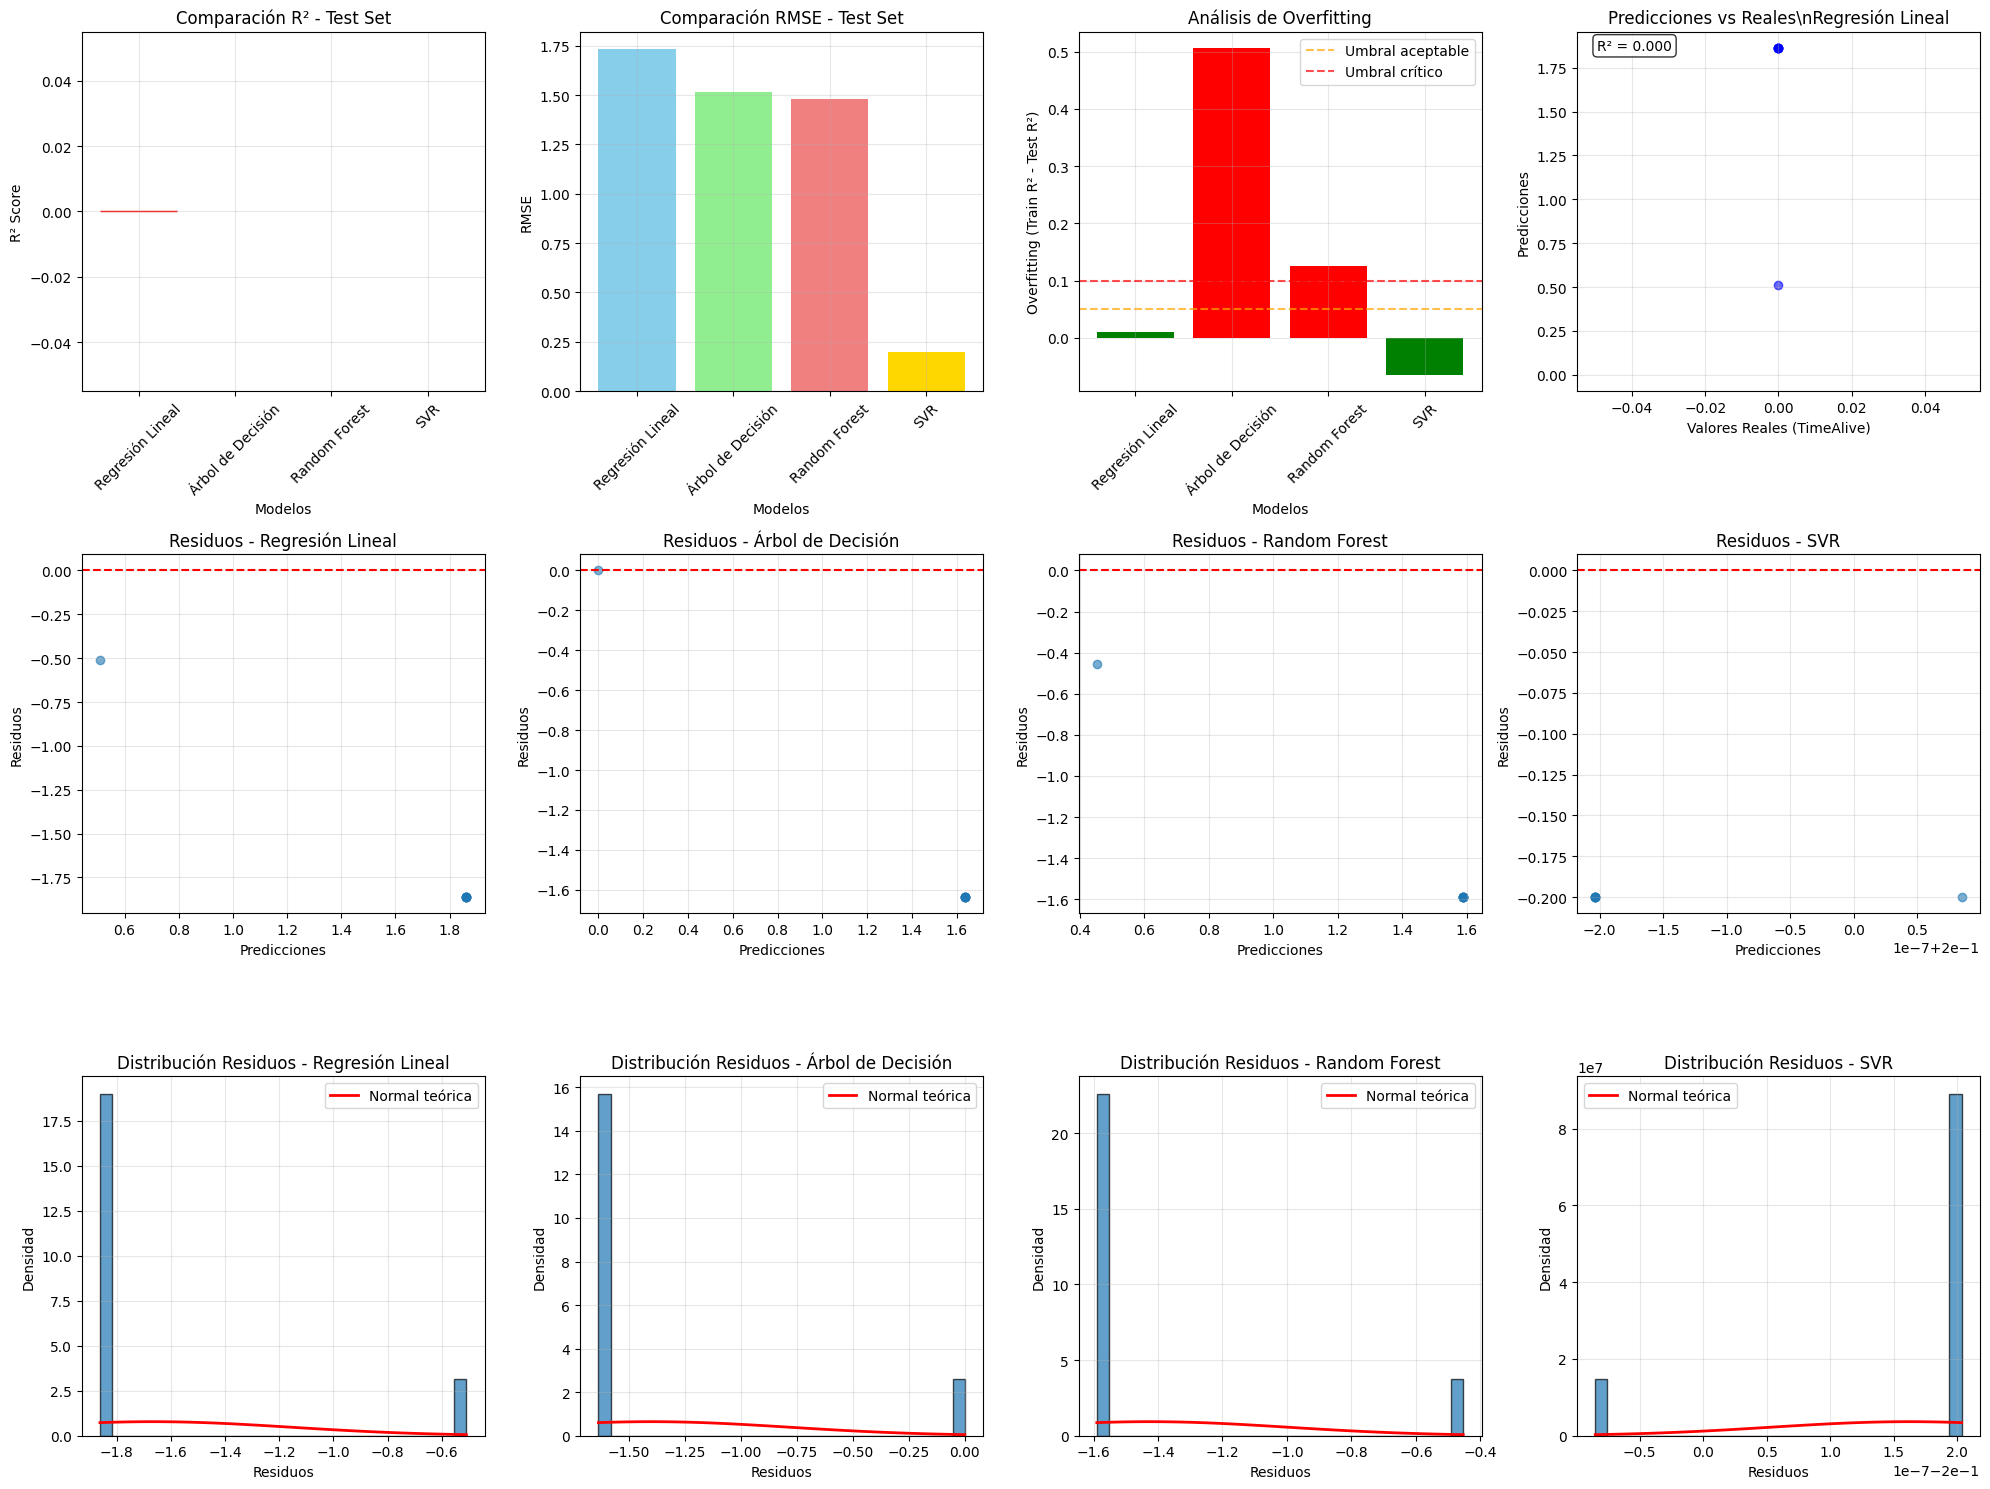

\n 5.7 REPORTE FINAL Y RECOMENDACIONES
---------------------------------------------
\n RESUMEN EJECUTIVO:
   • Modelo Recomendado: Regresión Lineal
   • R² Test: 0.0000
   • RMSE Test: 1.7343
   • MAE Test: 1.6684
   • Overfitting: 0.0107
\n INTERPRETACIÓN:
    Capacidad predictiva muy baja
\n RECOMENDACIONES:
   1.  Considerar más feature engineering
   2.  Recopilar más datos relevantes
   3.  Probar algoritmos más complejos (XGBoost, Neural Networks)
   4.  Revisar la selección de características
\n LIMITACIONES:
   • Basado en datos históricos de Counter Strike
   • Rendimiento puede variar con nuevas mecánicas del juego
   • Requiere monitoreo continuo en producción
\n FASE 5 COMPLETADA EXITOSAMENTE
 Evaluación completa finalizada
 Mejor modelo: Regresión Lineal


In [ ]:
# Ejecutar evaluación completa
resultados_evaluacion = fase5_evaluacion_completa(modelos, datos, evaluacion)



# Acceder a resultados específicos
mejor_modelo = resultados_evaluacion['modelo_recomendado']
tabla_final = resultados_evaluacion['tabla_resultados']
modelo_objeto = resultados_evaluacion['mejor_modelo_objeto']

# Para hacer predicciones con nuevos datos
# nuevas_predicciones = hacer_predicciones_nuevas(
#     modelo_objeto,
#     datos['scaler'],
#     nuevos_datos_df,
#     datos['features']
# )

print(f" Evaluación completa finalizada")
print(f" Mejor modelo: {mejor_modelo}")

## Fase 6: Deployment

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar despliegue del modelo